# Ford GoBike System Data
## by Eunsuk Ye

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This document is exploring the dataset to find any relationship between number of trips, time, trip types in various aspect and users.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import datetime as dt
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
!ls data

df_sf.pkl
ny
sf


In [3]:
bike_sf=pickle.load(open('data/df_sf.pkl','rb'))

In [3]:
bike_sf.shape

(5186258, 15)

In [8]:
bike_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186258 entries, 0 to 5186257
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 593.5+ MB


In [11]:
bike_sf.tail()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
5186253,353366,NaN,890,NaN,37.786677,-122.466642,NaN,2020-01-26 16:33:02,app,NaN,37.810492,-122.476752,NaN,2020-01-26 16:18:12,Customer
5186254,301867,NaN,1328,NaN,37.780677,-122.475797,NaN,2020-01-06 13:02:20,app,NaN,37.810496,-122.476856,NaN,2020-01-06 12:40:12,Subscriber
5186255,380070,NaN,12530,468.0,37.777870,-122.422953,Grove St at Gough St,2020-01-09 17:25:44,app,NaN,37.810550,-122.476451,NaN,2020-01-09 13:56:54,Subscriber
5186256,219934,NaN,1735,NaN,37.786252,-122.409532,NaN,2020-01-30 23:37:54,app,NaN,37.810575,-122.410644,NaN,2020-01-30 23:08:59,Subscriber
5186257,282535,NaN,6477,NaN,37.797196,-122.434999,NaN,2020-01-04 16:59:47,app,NaN,37.811147,-122.410889,NaN,2020-01-04 15:11:49,Customer


In [22]:
bike_sf.bike_share_for_all_trip.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [12]:
bike_sf.isnull().sum()

bike_id                          0
bike_share_for_all_trip     826284
duration_sec                     0
end_station_id              244593
end_station_latitude             0
end_station_longitude            0
end_station_name            243464
end_time                         0
rental_access_method       4879674
start_station_id            242073
start_station_latitude           0
start_station_longitude          0
start_station_name          240892
start_time                       0
user_type                        0
dtype: int64

In [4]:
bike_sf.shape

(5186258, 15)

In [5]:
bike=bike_sf

### What is the structure of your dataset?

This dataset has 15 features(Trip Duration in seconds,Start Time and Date,End Time and Date,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type("Subscriber" = Member or “Customer” = Casual)) and 5,186,258 observations. This was observed for 2 years and 7 months which is from June 2017 and January 2020 in the San Fransisco Bay area bike sharing system.

### What is/are the main feature(s) of interest in your dataset?

I would like to know how many times people use the bike and when they use. For that,I need to find how many data observed per date and per each time. I might be able to find with what purpose they use the bike based on the time they use. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think these features, start time and date, start station location(name, lat/lon), will be the key variables to support the investigation into how many uses per date and time.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [7]:
bike.duration_sec.describe()

count    5.186258e+06
mean     8.531382e+02
std      2.310198e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.690000e+02
75%      8.880000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [6]:
duration_max=bike.duration_sec.sort_values(ascending=False)[:2].index
bike.loc[duration_max,:]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
4864697,614329,NaN,912110,NaN,37.327656,-121.868598,NaN,2019-12-30 12:37:26,app,NaN,37.323757,-121.878614,NaN,2019-12-19 23:15:36,Customer
5011572,231296,NaN,811077,NaN,37.336549,-121.900961,NaN,2020-01-19 01:41:19,clipper,NaN,37.336035,-121.899836,NaN,2020-01-09 16:23:21,Subscriber


In [353]:
bike.loc[duration_max,['start_station_latitude','end_station_latitude','start_station_longitude','end_station_longitude']]

,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude
4864697,37.323757,37.327656,-121.878614,-121.868598
5011572,37.336035,37.336549,-121.899836,-121.900961


In [351]:
bike[np.abs(bike.start_station_latitude-bike.loc[duration_max[0],'start_station_latitude'])<0.000009]
#     (np.abs(bike.end_station_latitude-bike.loc[duration_max[0],'end_station_latitude'])<0.000009)]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,end_weekday,end_dayofmth,end_wkofyear,start_hour,end_hour,start_hrmin,end_hrmin,trip_type,cat_duration,duration_type
3624817,112220,NaN,378,NaN,37.330092,-121.898051,NaN,2019-06-19 20:33:43,app,NaN,...,2,19,25,20,20,20:27:24,20:33:43,s2,1,s
3799877,901225,NaN,266,NaN,37.330252,-121.886222,NaN,2019-07-07 18:31:52,app,NaN,...,6,7,27,18,18,18:27:26,18:31:52,s2,1,s
3799878,137485,NaN,205,NaN,37.320995,-121.883881,NaN,2019-07-09 12:27:55,app,NaN,...,1,9,28,12,12,12:24:29,12:27:55,s2,1,s
4739012,375241,NaN,962,NaN,37.317681,-121.915111,NaN,2019-11-28 10:27:43,app,NaN,...,3,28,48,10,10,10:11:40,10:27:43,s2,2,s
4864695,889859,NaN,293,NaN,37.332983,-121.911530,NaN,2019-12-18 17:04:05,clipper,NaN,...,2,18,51,16,17,16:59:12,17:04:05,s2,1,s
4864696,342421,NaN,380,NaN,37.333700,-121.886962,NaN,2019-12-16 11:06:56,app,NaN,...,0,16,51,11,11,11:00:35,11:06:56,s2,1,s
4864697,614329,NaN,912110,NaN,37.327656,-121.868598,NaN,2019-12-30 12:37:26,app,NaN,...,0,30,1,23,12,23:15:36,12:37:26,s2,7,l
4864698,474427,NaN,611,NaN,37.333459,-121.913517,NaN,2019-12-27 14:29:56,clipper,NaN,...,4,27,52,14,14,14:19:44,14:29:56,s2,2,s
5002940,892707,NaN,1014,NaN,37.323856,-121.921593,NaN,2020-01-04 14:02:47,app,NaN,...,5,4,1,13,14,13:45:52,14:02:47,s2,2,s
5002941,171489,NaN,852,NaN,37.330952,-121.859711,NaN,2020-01-09 16:17:49,app,NaN,...,3,9,2,16,16,16:03:37,16:17:49,s2,2,s


I found 2 cases of extremely high bike use duration. These are very far from mean or median and 75% quartile and only 2 observation. Also it looks like impossible duration time per one bike transaction for normal use. So I'm going to remove these 2 rows.

In [7]:
# drop 2 rows of outlier
bike.drop(duration_max,inplace=True)

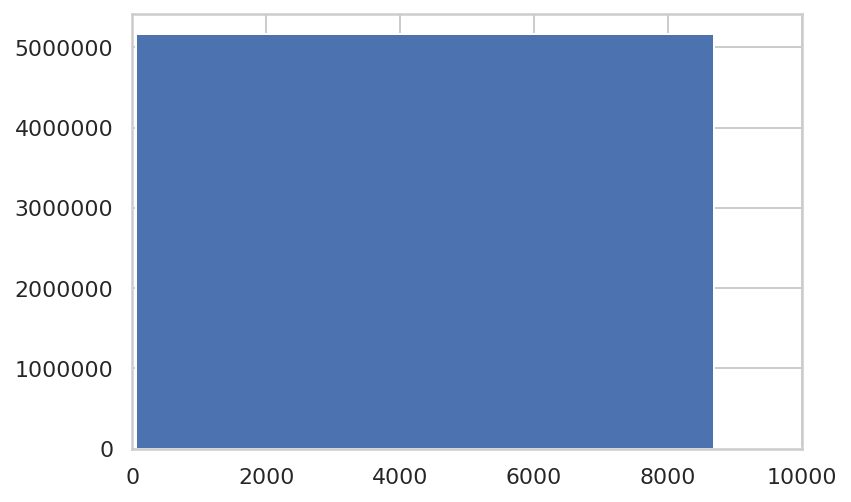

In [496]:
# histogram of duration time
plt.hist(bike.duration_sec)
plt.xlim(0,10000)
plt.show()

Duration_sec feature's histogram or distribution plot is not easy to interpret. I'm going to cut as time-partitioned group. min value is 60 and max value is 86369. The unit is second. 6 groups: 1 min ~ 10 min, 10 min ~ 30 min, 30 min~ 1 hour, 1 hour ~ 1.5 hour, 1.5 hour~ 5 hour, 5 hours and more. I want to make it more simple so regroup the 6 groups as 3 like short trip, mid trip, long trip. Short trip is less 30 min and mid trip is less than 1.5 hour and long trip can be 1.5 hour or more.

In [8]:
# category of duration: 1:1m~10m / 2:10m~30m / 3: 30m~1h / 4: 1h~1.5h / 5: 1.5h~5h / 6: 5h~24h
# duration type: s: short trip(less 30m) / m:mid trip(30m~1.5h) / l:long trip(more than 1.5h)

bike['cat_duration']=pd.cut(bike.duration_sec,bins=[60,600,1800,3600,5400,18000,86400],labels=[1,2,3,4,5,6])
bike['duration_type']=bike.cat_duration.apply(lambda x: 's' if x<3 else 'm' if x<5 else 'l')

In [366]:
cat_duration.value_counts()

1    2762825
2    2160209
3     181525
5      37772
4      32978
6      10855
7          2
Name: duration_sec, dtype: int64

In [274]:
bike.query('start_weekday < 5' and 'end_weekday < 5' and '6 < start_hour < 10').cat_duration.value_counts()

(60, 600]          709577
(600, 1800]        568788
(1800, 3600]        17856
(5400, 18000]        4110
(3600, 5400]         2931
(18000, 86400]       1603
(86400, 920000]         0
Name: cat_duration, dtype: int64

In [275]:
bike.query('start_weekday < 5' and 'end_weekday < 5' and '6 < start_hour < 10 or 15 < start_hour < 20').cat_duration.value_counts()

(60, 600]          1646629
(600, 1800]        1333452
(1800, 3600]         75985
(5400, 18000]        12493
(3600, 5400]         11779
(18000, 86400]        4301
(86400, 920000]          1
Name: cat_duration, dtype: int64

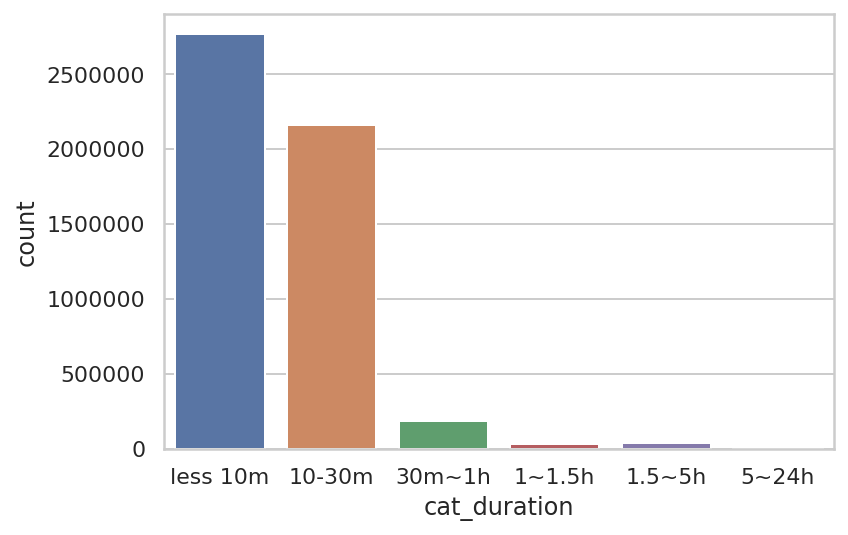

In [372]:
sb.countplot(data=bike, x='cat_duration');
plt.xticks(ticks=[0,1,2,3,4,5],labels=['less 10m','10-30m','30m~1h','1~1.5h','1.5~5h','5~24h'])
plt.show()

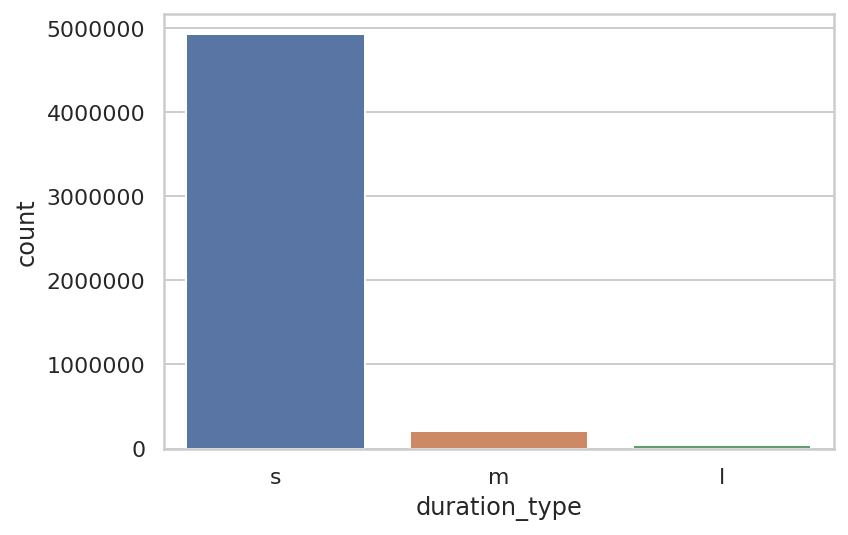

In [373]:
sb.countplot(data=bike, x='duration_type',order=['s','m','l']);

People mostly use the bike for less 30 minutes according to the above countplot. And this is short trip based on my grouping definition.

start_time(, end_time) features include date and time. It means we can extract several other time related information such as week of day, season, first/last day of month and so on.

In [9]:
# convert datatype from string to datetime
bike['start_time']=pd.to_datetime(bike.start_time)

In [10]:
bike['start_year']=bike.start_time.dt.year
bike['start_month']=bike.start_time.dt.month
bike['start_weekday']=bike.start_time.dt.dayofweek
bike['start_dayofmth']=bike.start_time.dt.day
bike['start_wkofyear']=bike.start_time.dt.weekofyear
bike['start_hour']=bike.start_time.dt.hour
bike['start_hrmin']=bike.start_time.dt.time
bike['start_yrmth']=bike.start_time.dt.to_period('M')

In [11]:
# convert datatype from string to datetime
bike['end_time']=pd.to_datetime(bike.end_time)

In [12]:
bike['end_year']=bike.end_time.dt.year
bike['end_month']=bike.end_time.dt.month
bike['end_weekday']=bike.end_time.dt.dayofweek
bike['end_dayofmth']=bike.end_time.dt.day
bike['end_wkofyear']=bike.end_time.dt.weekofyear
bike['end_hour']=bike.end_time.dt.hour
bike['end_hrmin']=bike.end_time.dt.time

In [13]:
# this new variable has two categorical values, weekday or weekend 
bike['weekday_type']=bike.start_weekday.apply(lambda x:'weekday' if (x!=5 and x!=6) else 'weekend')
bike.weekday_type.unique()

array(['weekend', 'weekday'], dtype=object)

In [110]:
bike[bike.start_station_id==bike.end_station_id][['start_station_latitude','end_station_latitude','start_station_longitude','end_station_longitude']]

,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude
2,37.870348,37.870348,-122.267764,-122.267764
5,37.776598,37.776598,-122.395282,-122.395282
6,37.866249,37.866249,-122.299371,-122.299371
7,37.784872,37.784872,-122.400876,-122.400876
8,37.791300,37.791300,-122.399051,-122.399051
...,...,...,...,...
5182377,37.804770,37.804770,-122.403234,-122.403234
5182418,37.804770,37.804770,-122.403234,-122.403234
5182422,37.804770,37.804770,-122.403234,-122.403234
5182504,37.804770,37.804770,-122.403234,-122.403234


In [14]:
# definition of trip type: s1: returned to same station / s2:start station and end station is different

bike['trip_type']=bike.apply(lambda x:'s1' if x.start_station_id==x.end_station_id else 's2' ,axis=1)

In [15]:
# if start and end station is null but latitude of start and end are same, trip_type is s1(returned)
bike.loc[bike[bike.start_station_id.isnull()].query('start_station_latitude==end_station_latitude').index,'trip_type']='s1'

In [134]:
bike[bike.start_station_id.isnull()].query('start_station_longitude==end_station_longitude' and 'trip_type=="s2"')[['start_station_latitude','end_station_latitude','start_station_longitude','end_station_longitude','trip_type']]

,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude,trip_type
1143129,37.410000,37.420000,-121.940000,-121.940000,s2
1143179,37.410000,37.420000,-121.940000,-121.940000,s2
1143250,37.400000,37.410000,-121.930000,-121.940000,s2
1143251,37.400000,37.410000,-121.920000,-121.940000,s2
1143363,37.410000,37.400000,-121.930000,-121.920000,s2
...,...,...,...,...,...
5186253,37.810492,37.786677,-122.476752,-122.466642,s2
5186254,37.810496,37.780677,-122.476856,-122.475797,s2
5186255,37.810550,37.777870,-122.476451,-122.422953,s2
5186256,37.810575,37.786252,-122.410644,-122.409532,s2


In [137]:
# total number of station where started and arrived
bike.start_station_id.nunique(), bike.end_station_id.nunique()

(453, 453)

In [187]:
station_busy_list_s=bike.start_station_name.value_counts()
station_busy_list_e=bike.end_station_name.value_counts()

In [202]:
station_busy_list_s=station_busy_list_s.reset_index(name='cnt')
station_busy_list_e=station_busy_list_e.reset_index(name='cnt')

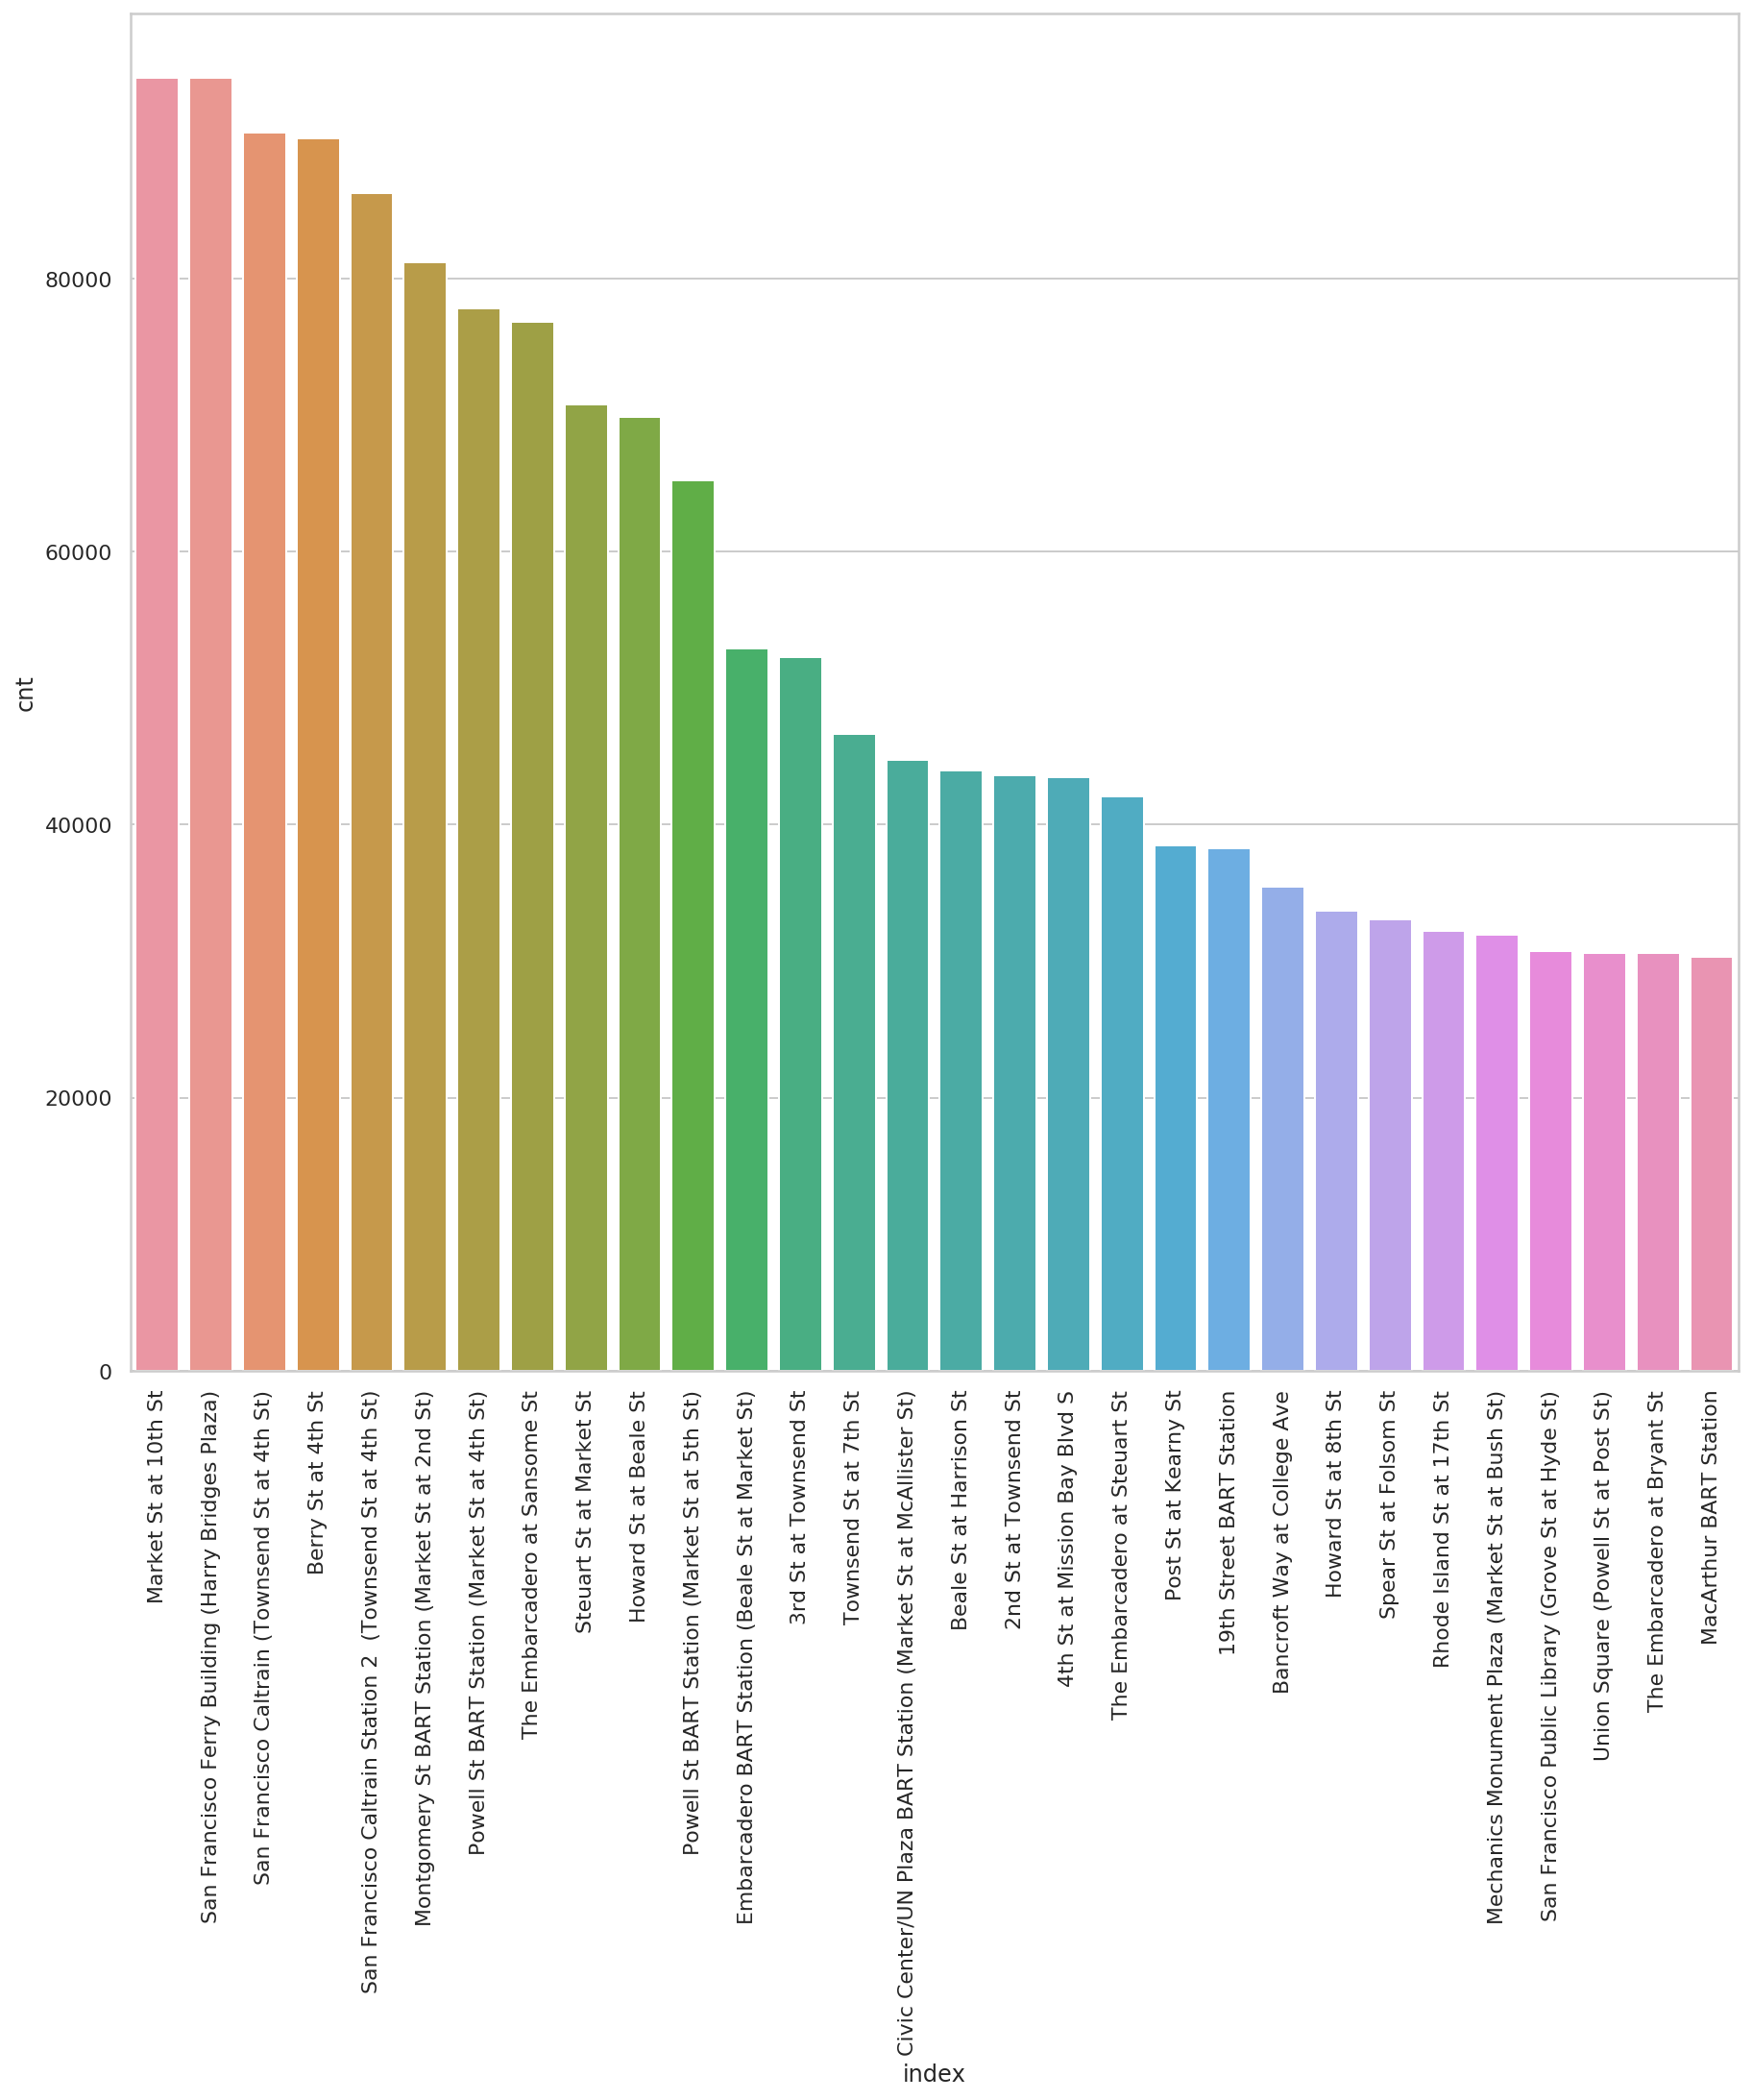

In [322]:
# count distribution of top 30 of start station
plt.figure(figsize=(15,13))
sb.barplot(data=station_busy_list_s[:30],x='index',y='cnt')
plt.xticks(rotation=90)
plt.show()

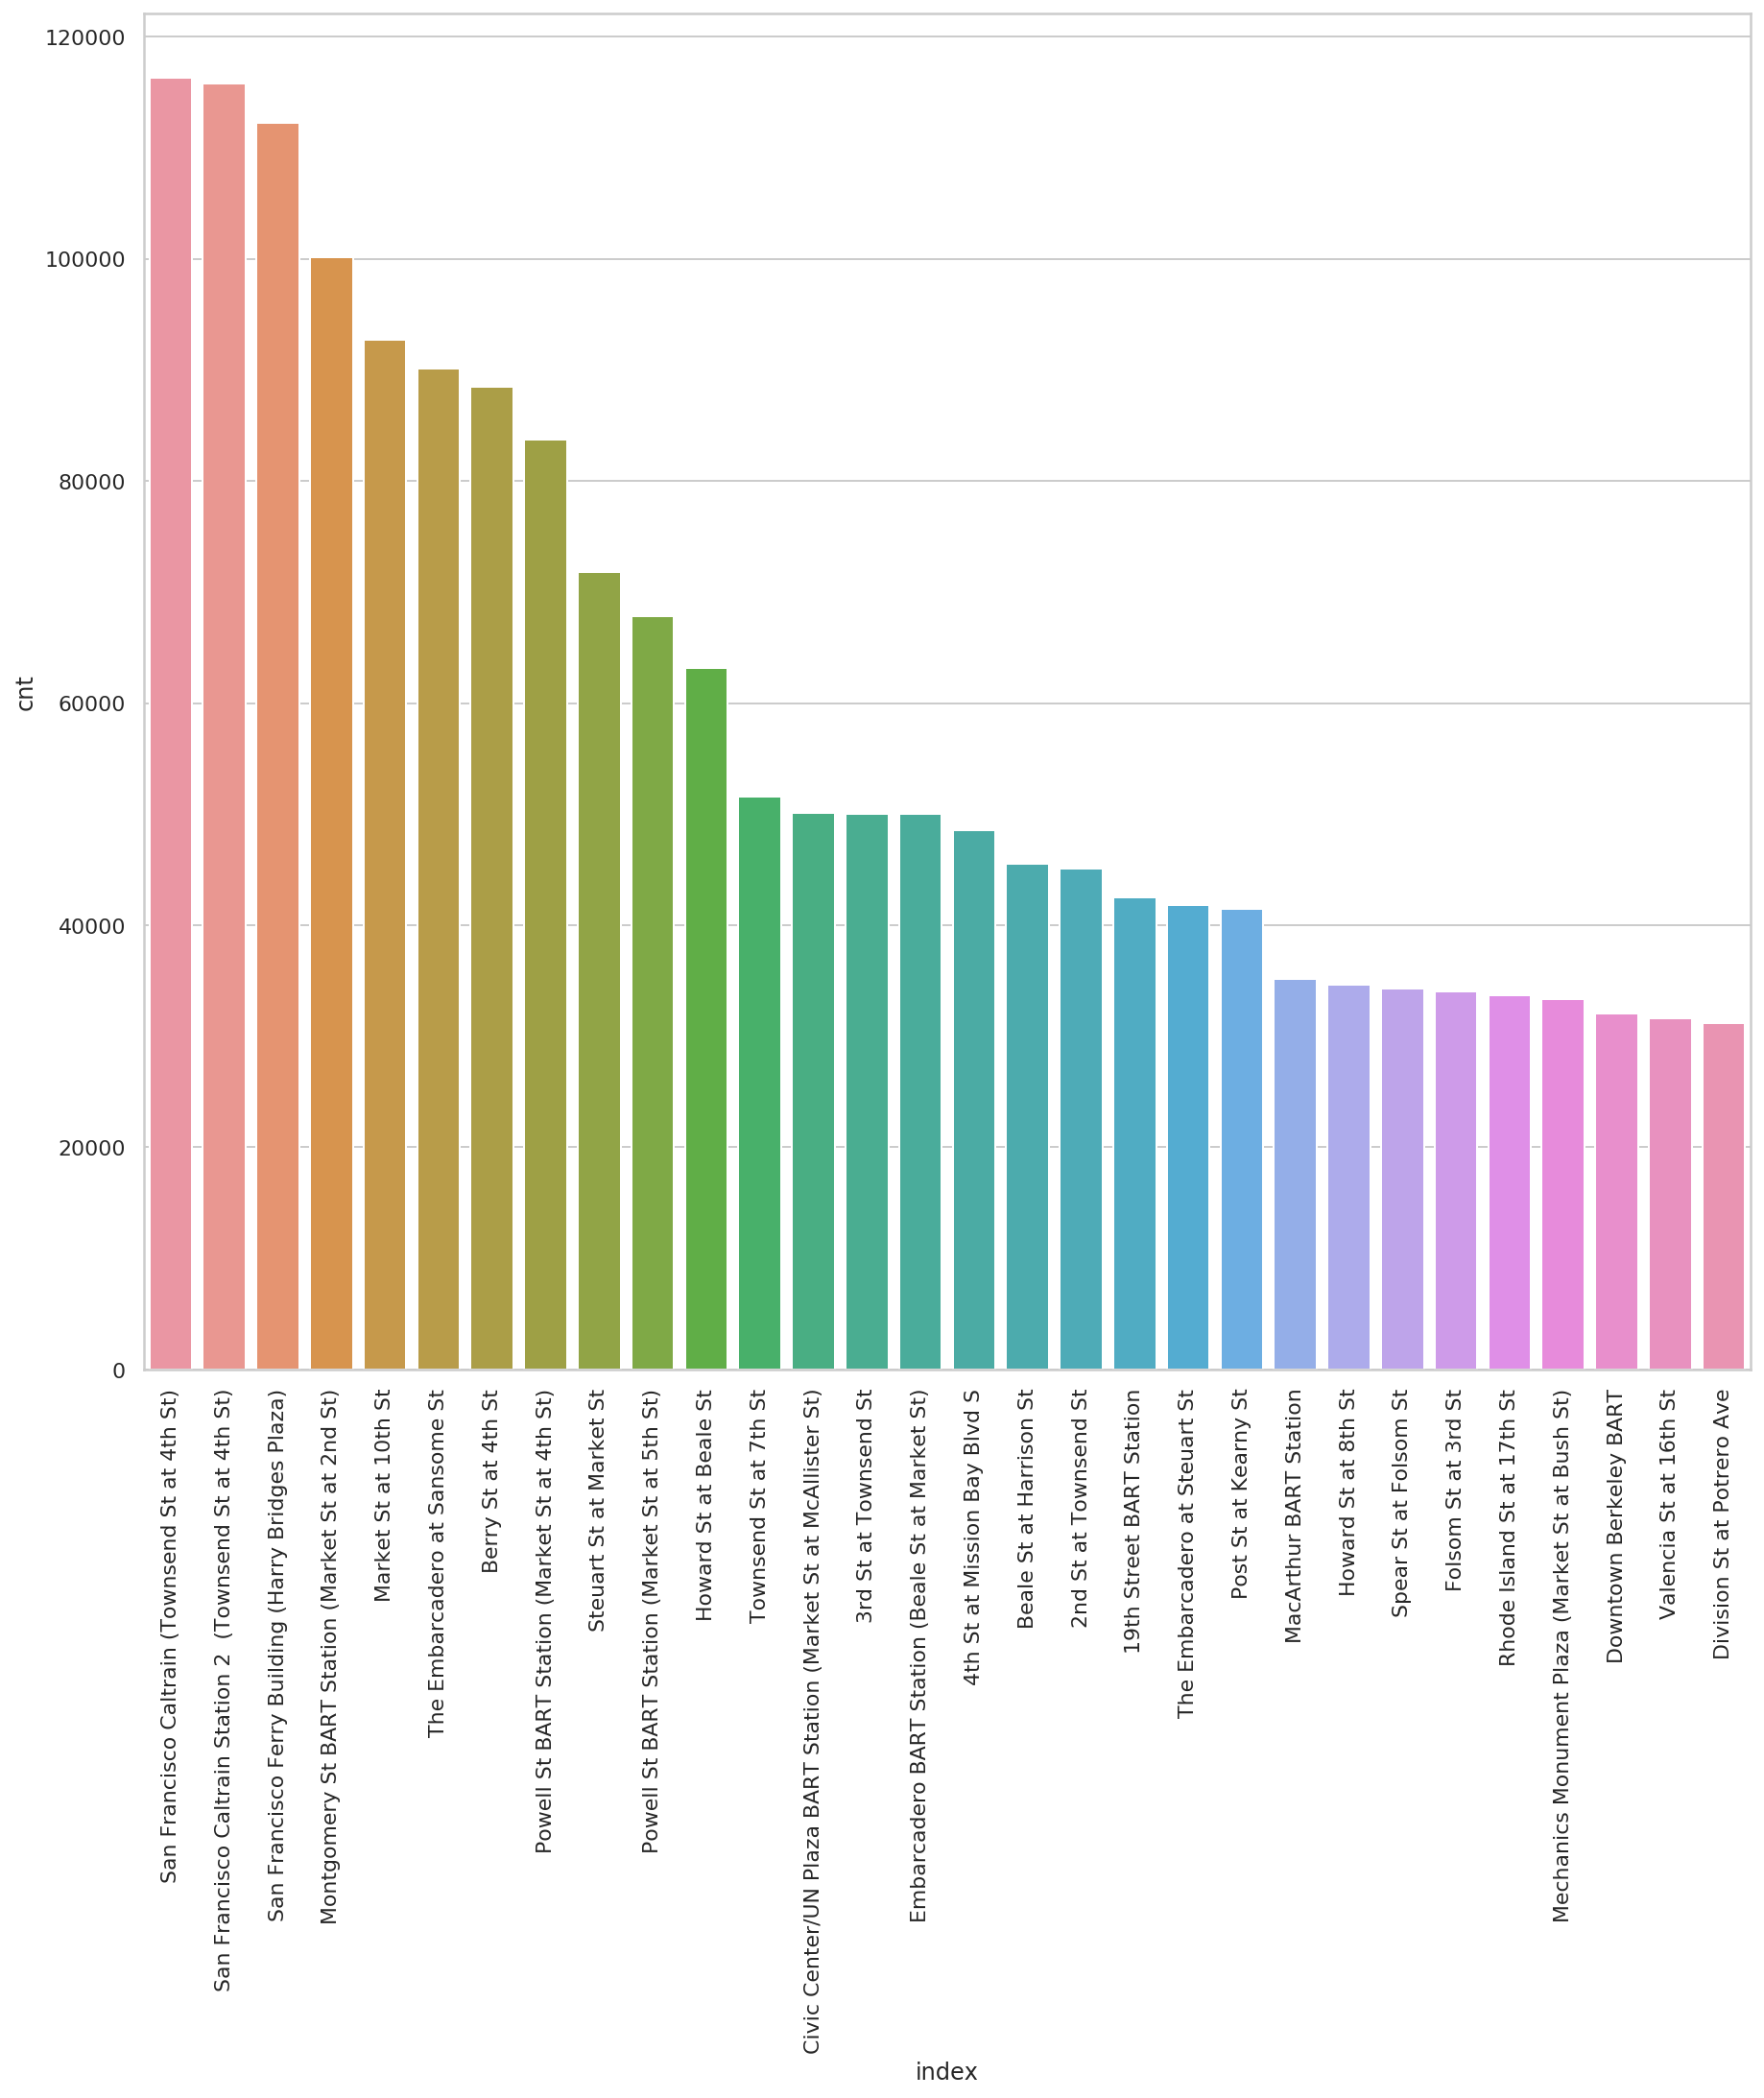

In [323]:
# bar plot of top 30 of destination station
plt.figure(figsize=(15,13))
sb.barplot(data=station_busy_list_e[:30],x='index',y='cnt')
plt.xticks(rotation=90)
plt.show()

I listed station names used as start and destination in order of usage frequency. Top 30 stations looks like to be more frequently used than others. Under the 30, the usage is decreasing with small amount gradually.

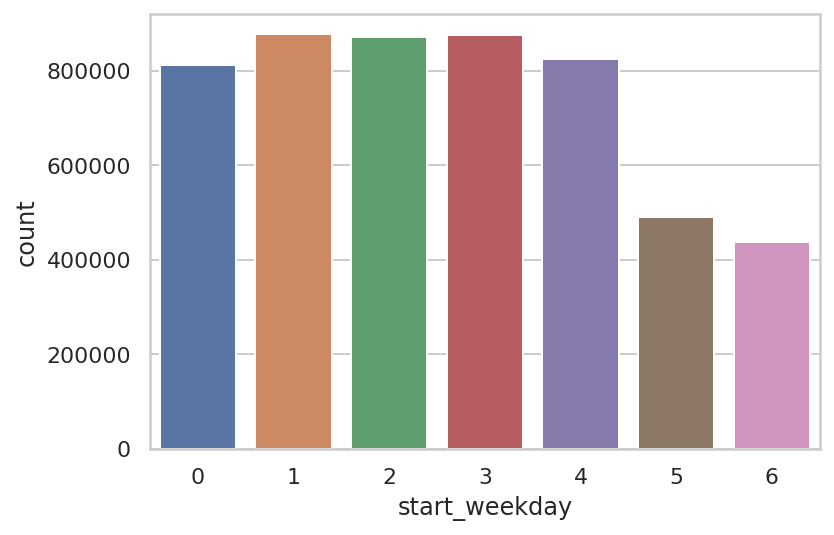

In [209]:
# 0:Monday, 5,6:Saturday, Sunday
sb.countplot(data=bike,x='start_weekday');

I drawed weekly usage plot. People use the bike more on Monday through Friday than Saturday or Sunday.

In [212]:
bike.start_time.min(),bike.start_time.max()

(Timestamp('2017-06-28 09:47:36.347000'), Timestamp('2020-01-31 23:59:48'))

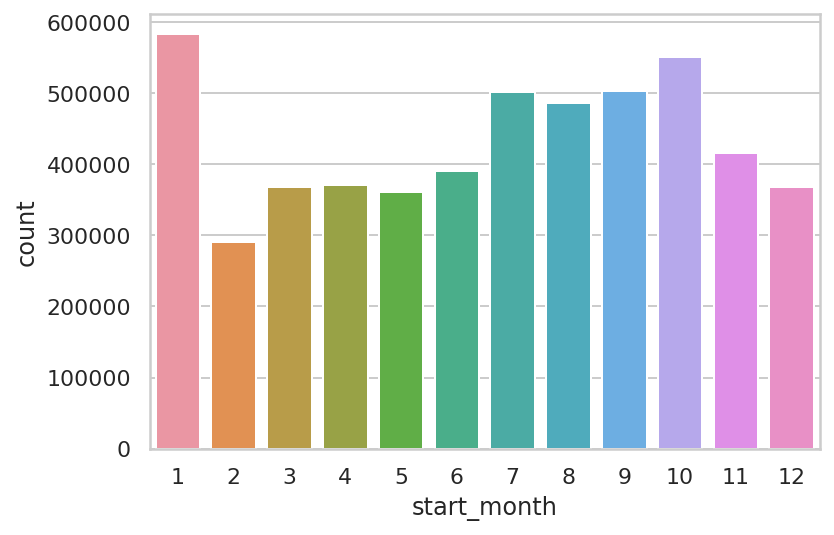

In [227]:
# plot distribution only start time's month
# monthly usage
sb.countplot(data=bike,x='start_month');

I drawed monthly usage plot. In here, January and 7,8,9,10 has higher usage. Autumn usage is understanable but January is weird because it's winter season. If winter is truly high usage season, December and February also should be higher together than other seasons or at least similar height with autumn season's. But the plot doesn't look like. One of the reason may be this: the data is including from almost July 2017 and until January 2020. From 2017 to 2020 bike usage become higher so that January of 2020, the lastest month of the data, has the highest bike usage observation. So I guess monthly usage plot should be drawed by year to see more exact pattern.

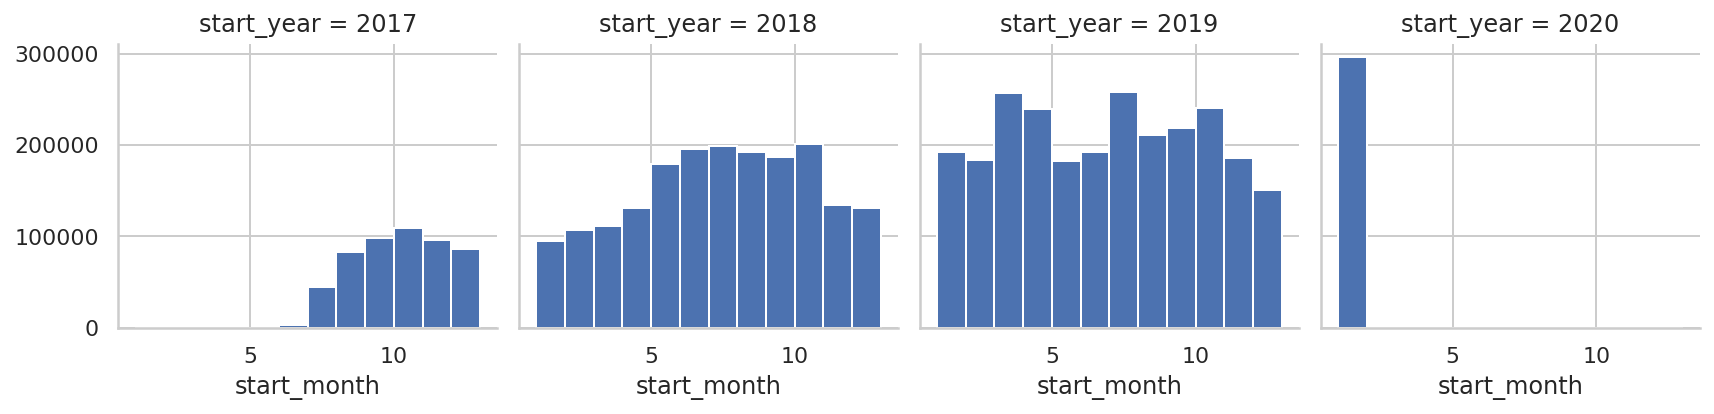

In [217]:
# plot distribution only start time's month year by year
# montly usage by year
g=sb.FacetGrid(data=bike,col='start_year')
g.map(plt.hist,'start_month',bins=np.arange(1,13+1,1))

I plot monthly usage per year by using FacetGrid. Now I see high usage pattern in autumn and spring season. Also the bike usage increase year by year and in last month of the last year of the data, January 2020, have the highest peak. I can assume the usage after January 2020 keep increasing based on the increase pattern year by year. In the previous monthly usage plot I saw January is one of the peak usage season. That's why increasing pattern year by year and I only have January data of 2020. When I divide monthly plot by year winter is not the peak season. The reason spring of 2018 has not high usage can be assumed like that the bike sharing system was still not known well among the people or because of the bad weather like long heavy rainy days or storm, etc.

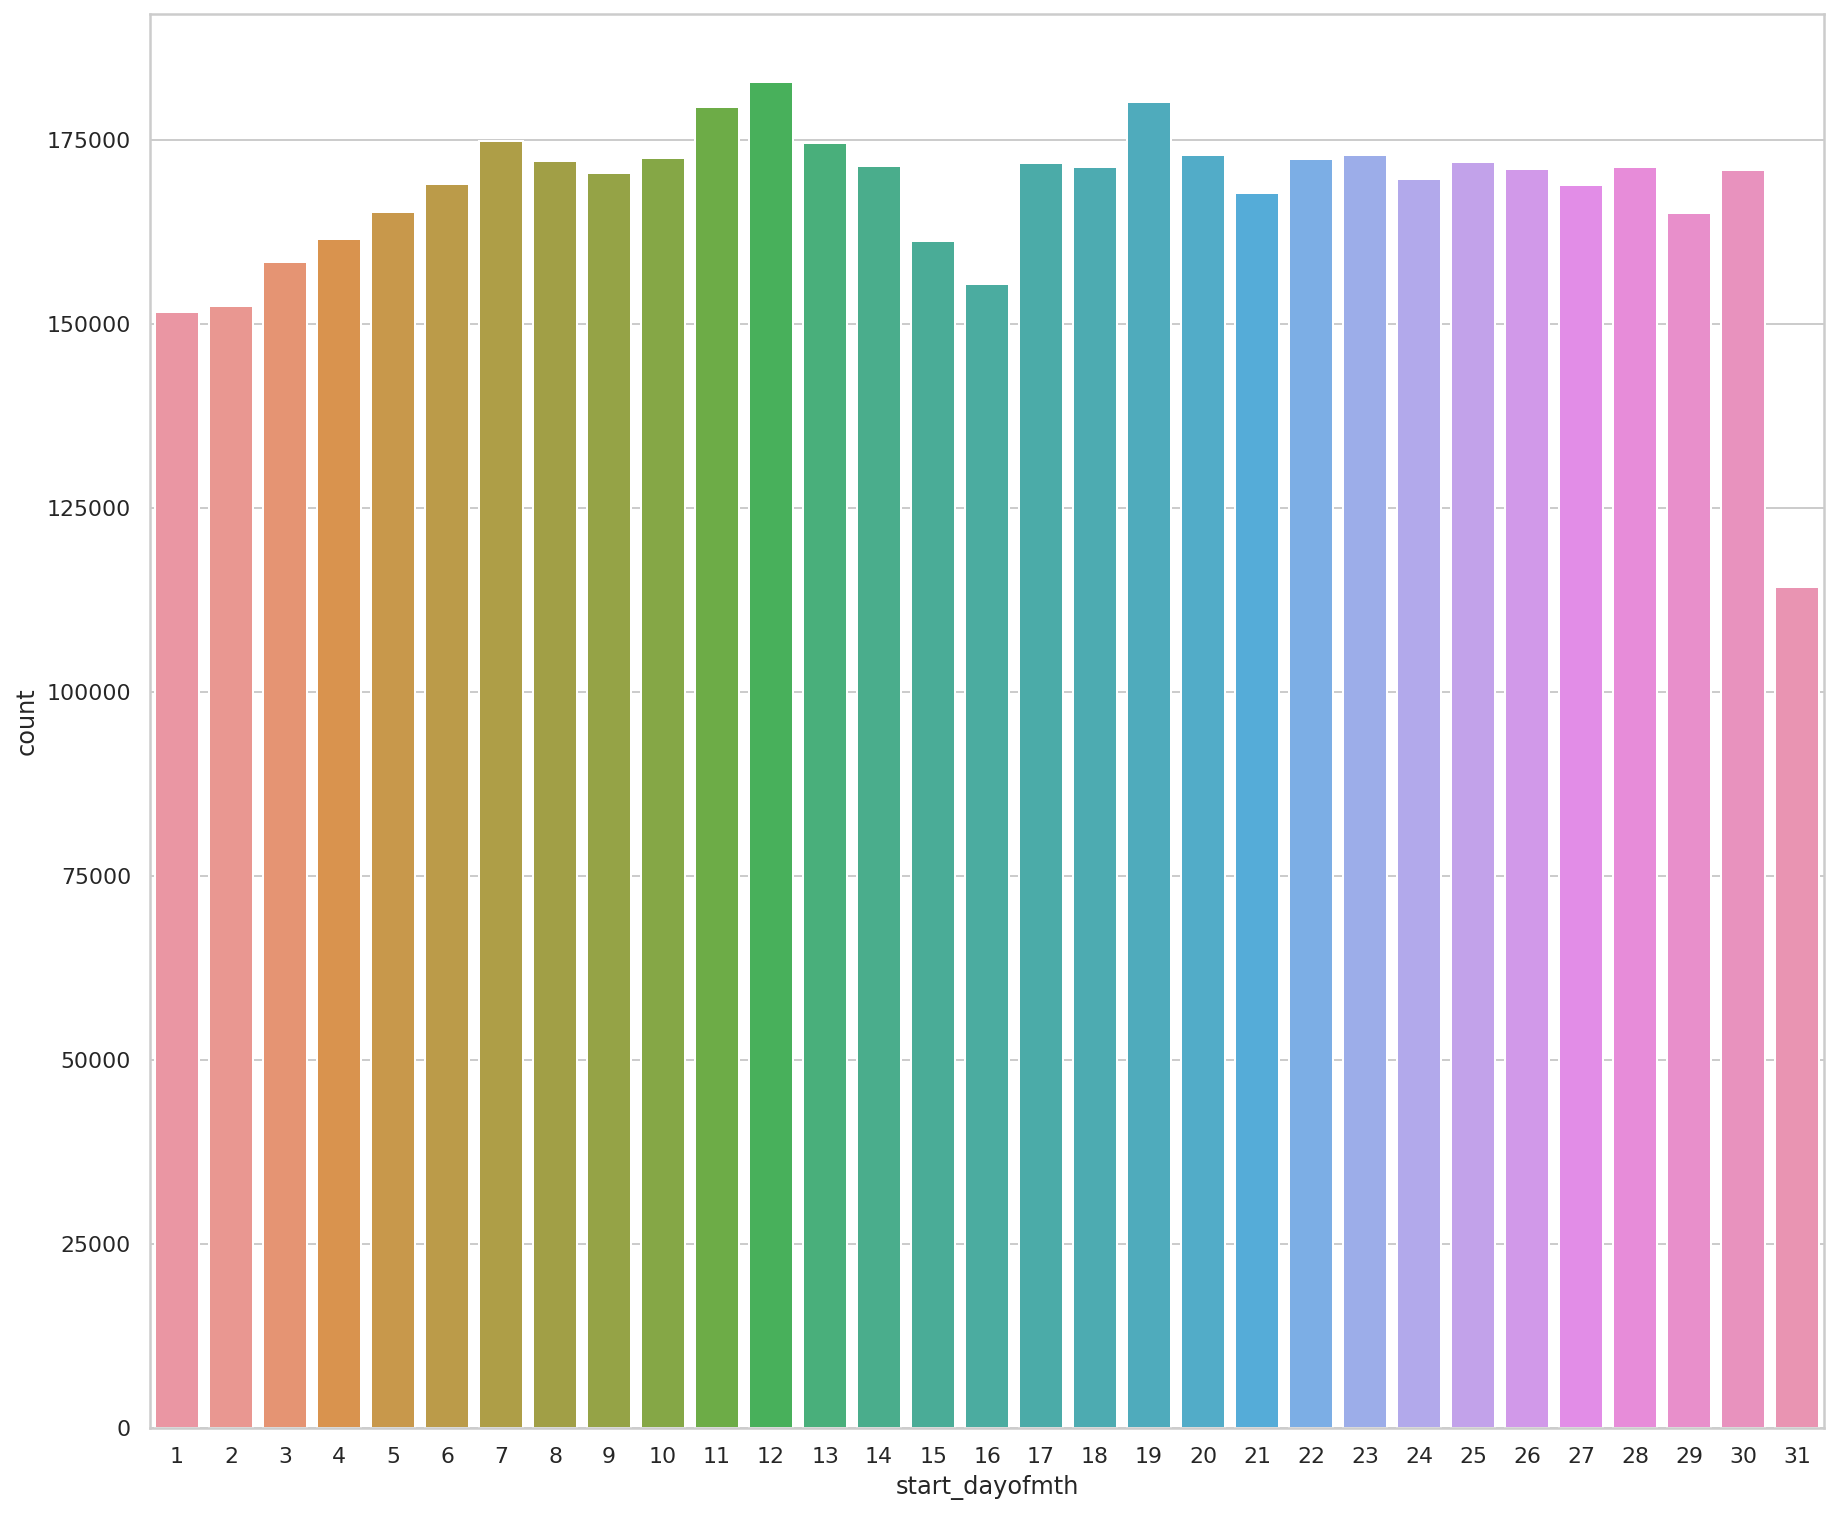

In [439]:
# countplot for day of month of start time
# daily of the month usage
plt.figure(figsize=(15,13))
sb.countplot(data=bike,x='start_dayofmth');

the last day, 31, has the lowest usage. The reason may be that about half of the 12 month doesn't include 31st day. First and second day of the month and 15th and 16th day as middle of the month are having slightly decreased usage. I cann't speculate why this happen. Let's keep going.

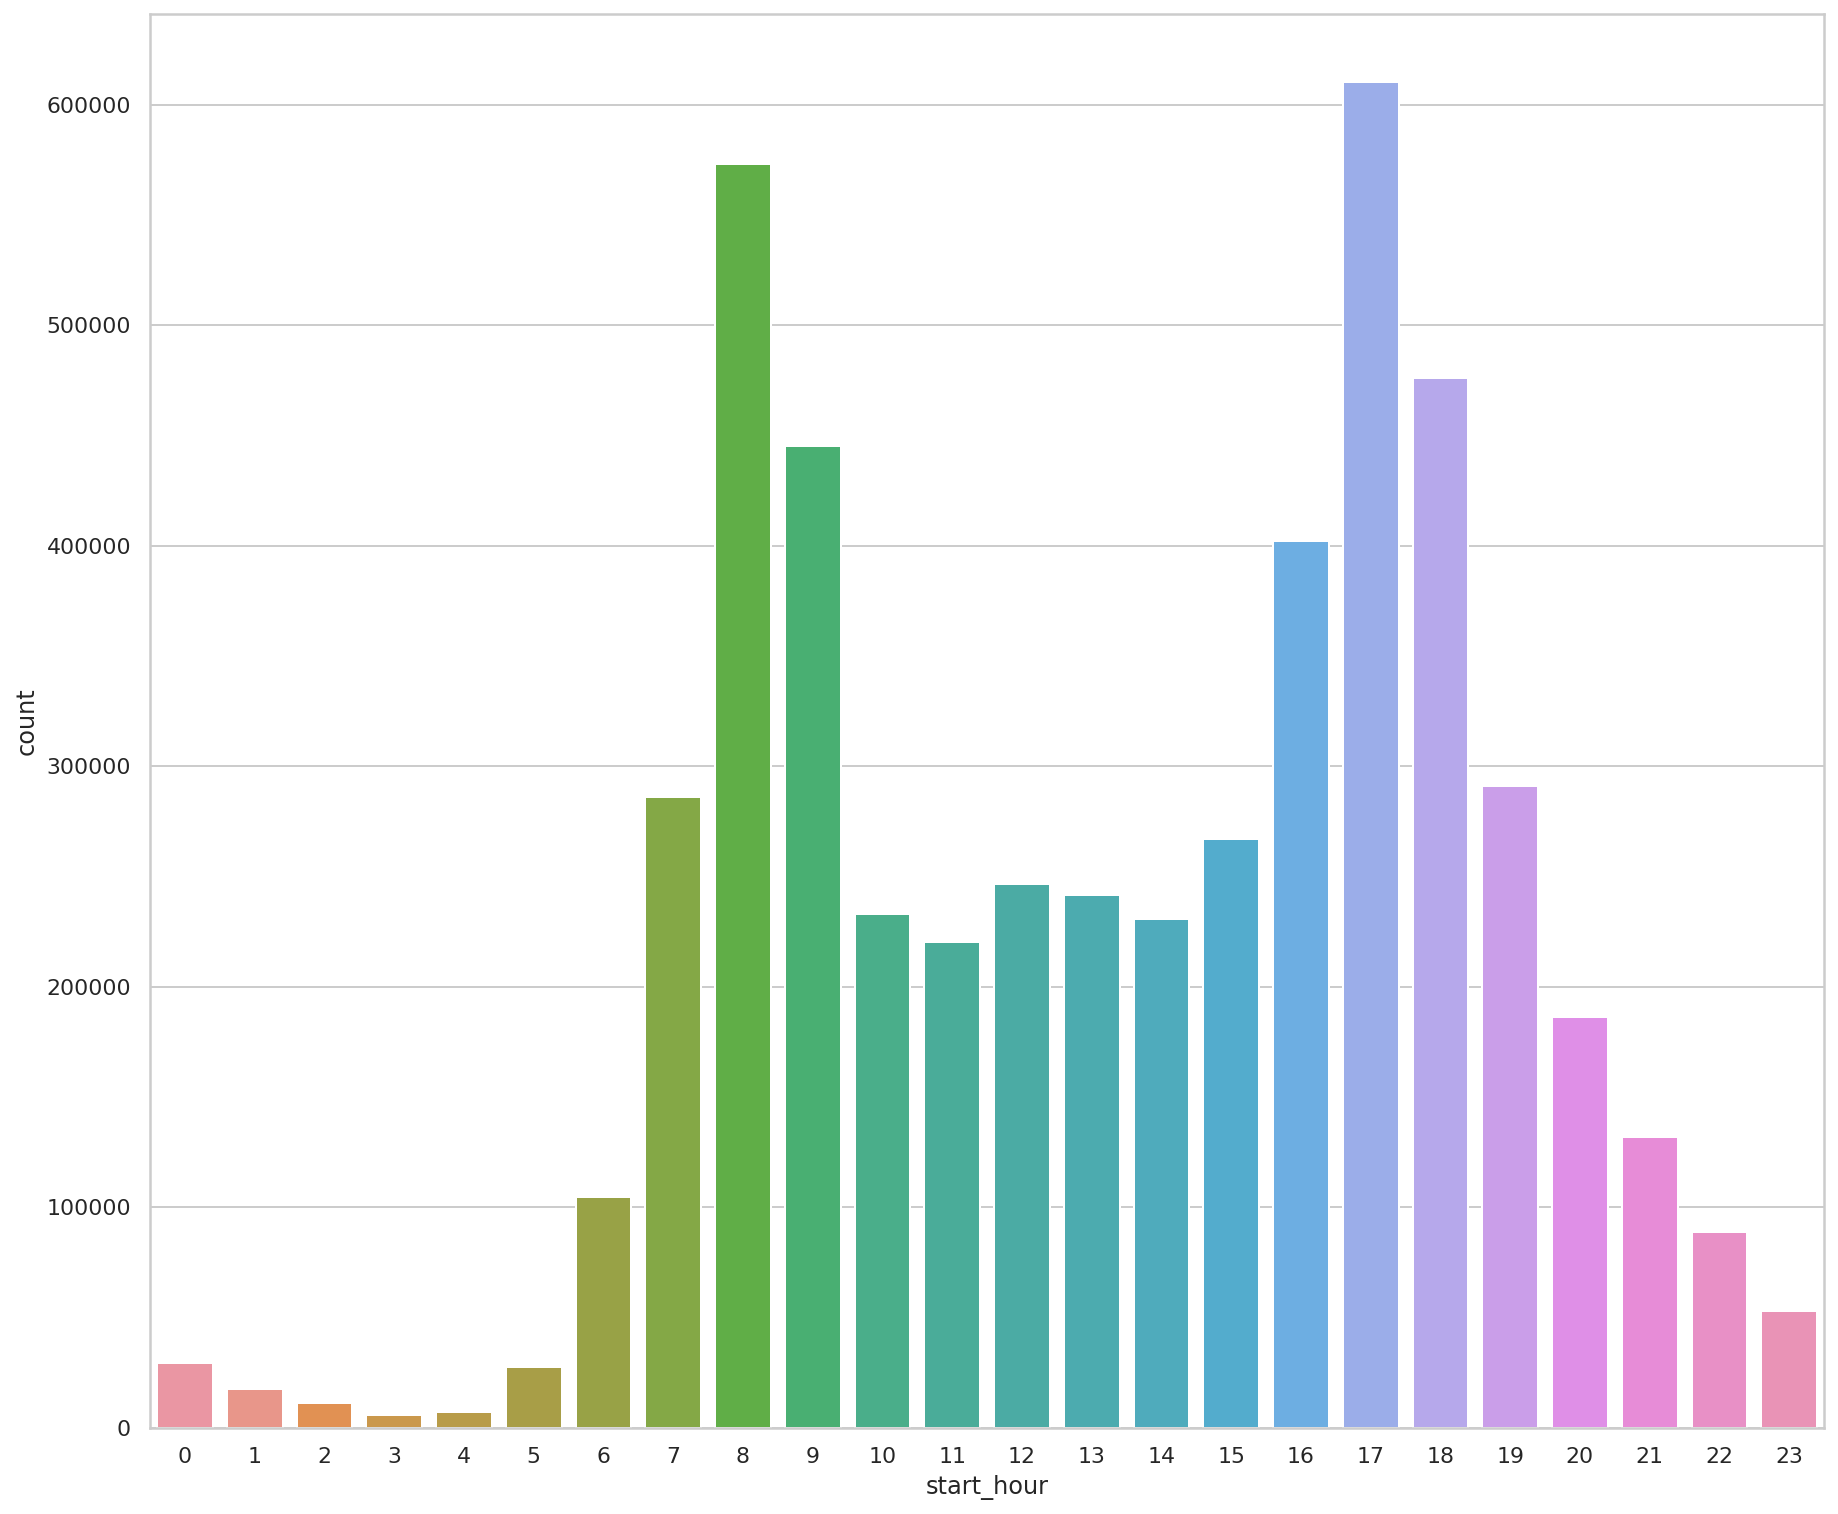

In [220]:
# countplot for trip start hour time
# hourly usage
plt.figure(figsize=(15,13))
sb.countplot(data=bike,x='start_hour');

hourly usage plot has bimodal. This means most people use the bike to commute to work. From night to early morning the usage become lower and lower. Then how it will be changed on weekend most people don't go to work? I need to plot this hourly usage by dividing weekday and weekend.

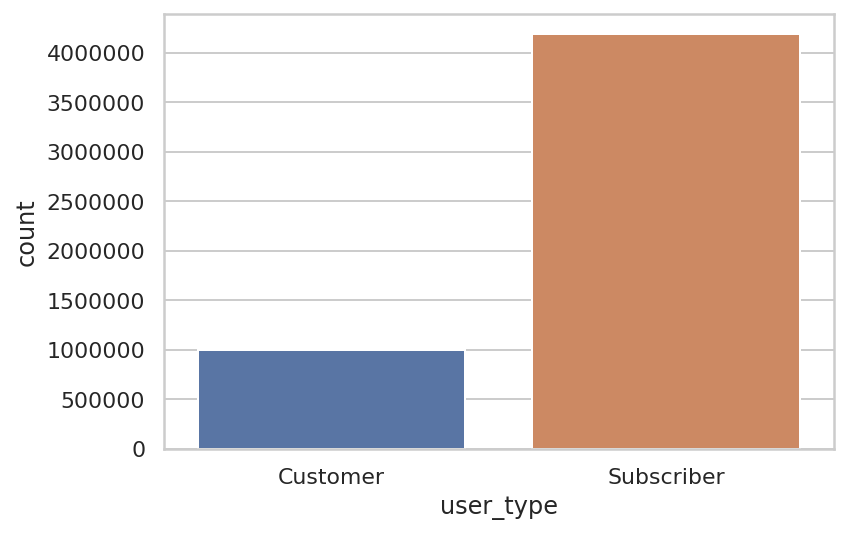

In [225]:
# usage per user type
sb.countplot(data=bike,x='user_type');

superiorly registered member(subscriber) uses bike. I guess the members are use when they commute to work because usage peak is in commuting time. Let's see plot what time(hour) each user type are mostly uses bike.

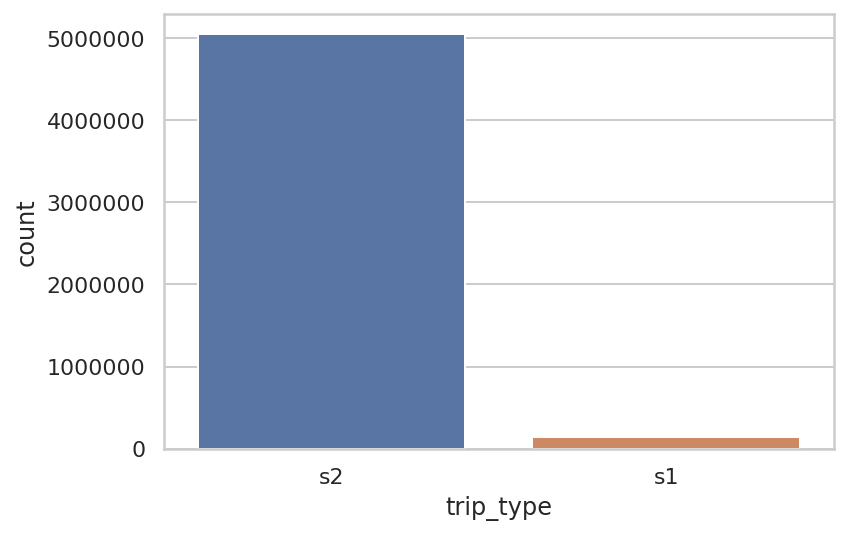

In [226]:
#usage per trip type
sb.countplot(data=bike,x='trip_type');

superiorly the trip(s2) that start and destination station is different is more than the returned to start trip(s1). This might be also due to the high peak of work commuting usage. Then I wonder when the returned to start trip(s1) is happend. weekday? weekend? daytime? nighttime?

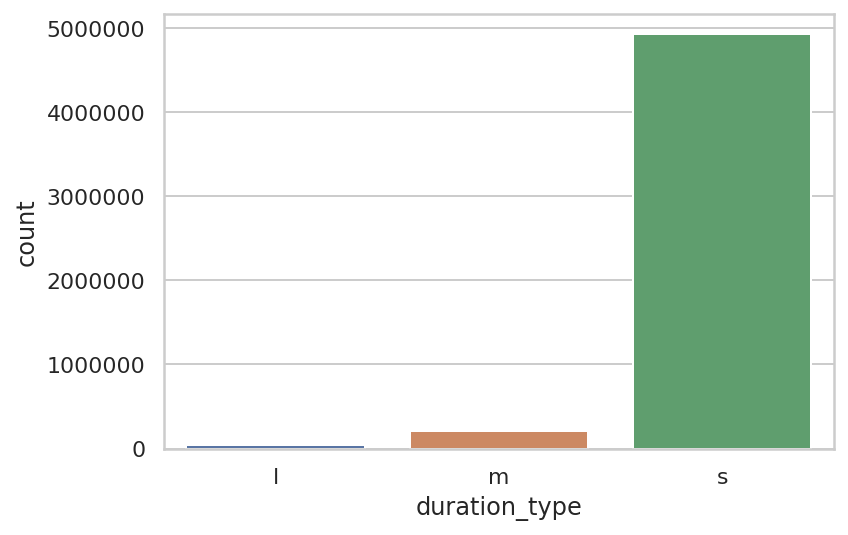

In [440]:
# usage per duration type(short, mid, long)
sb.countplot(data=bike,x='duration_type')
plt.show()

overwhelmingly short trip is happend than mid or long trip. I also guess this due to the high peak of work commuting usage. Later let's plot usage per duration type divided by weekday/weekend or hourly.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the duration_sec I saw the 2 maximum values that is not possible to be happend. I assumed this inccured by mistake or error and removed it. There are null value in the start_station_id and end_station_id but those observations is still including geographic coordinate and start_time and end_time. So those data is remained.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
When I draw histogram for duration_sec feature it was not able to identify its distribution correctly due to extremely high amount of data. So the duration_sec feature needed to be changed in other form. Minimum duration is 60 second and maximum duration is about 24 hours. I divided the orinigal integer data as 6 categorical values by ranging time and applied pandas's cut function. The 6 categorys are 1 min through 10 min, 10 min through 30 min, 30 min through 1 hour, 1 hour through 1 hour and half min, 1 hour and half through 5 hours and 5 hours through 24 hours. Additionaly I added another simpler version of duration feature which is having 3 categorical values, short trip, mid trip and long trip. Short trip can be less than 30 min, mid trip can be less than 1 hour and half and long can be longer than mid trip. 
date time feature is containing more  time-related features such as day of week, seasons, day of the month. I extracted these information from start_time and end_time and created as new categorical variables. From these variables I could search if the data has time-related patterns.
I added another new variable, trip type, using start_station_id and end_station_id that have 2 categorical values, s1, s2. If a trip ended at the start station(same with start station and end station) I define as s1, if a trip ended at different with start stataion, s2. 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

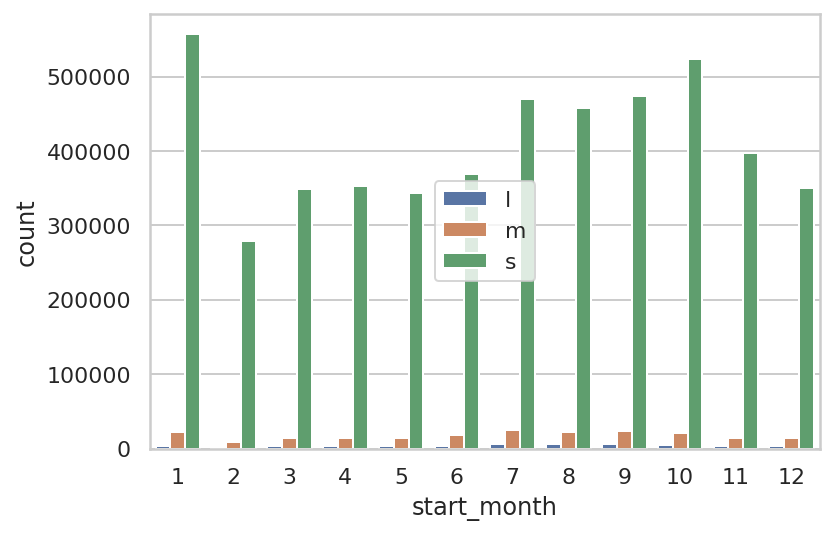

In [578]:
# monthly usage per duration type
g=sb.countplot(data=bike, x='start_month',hue='duration_type')
plt.legend(loc='center')
plt.show()

I see usage of January is highest. It looks not normal. It need to be deep looking. Except January, high usage months are 7,8,9,10. This make send. Summer and fall is good season for biking. 

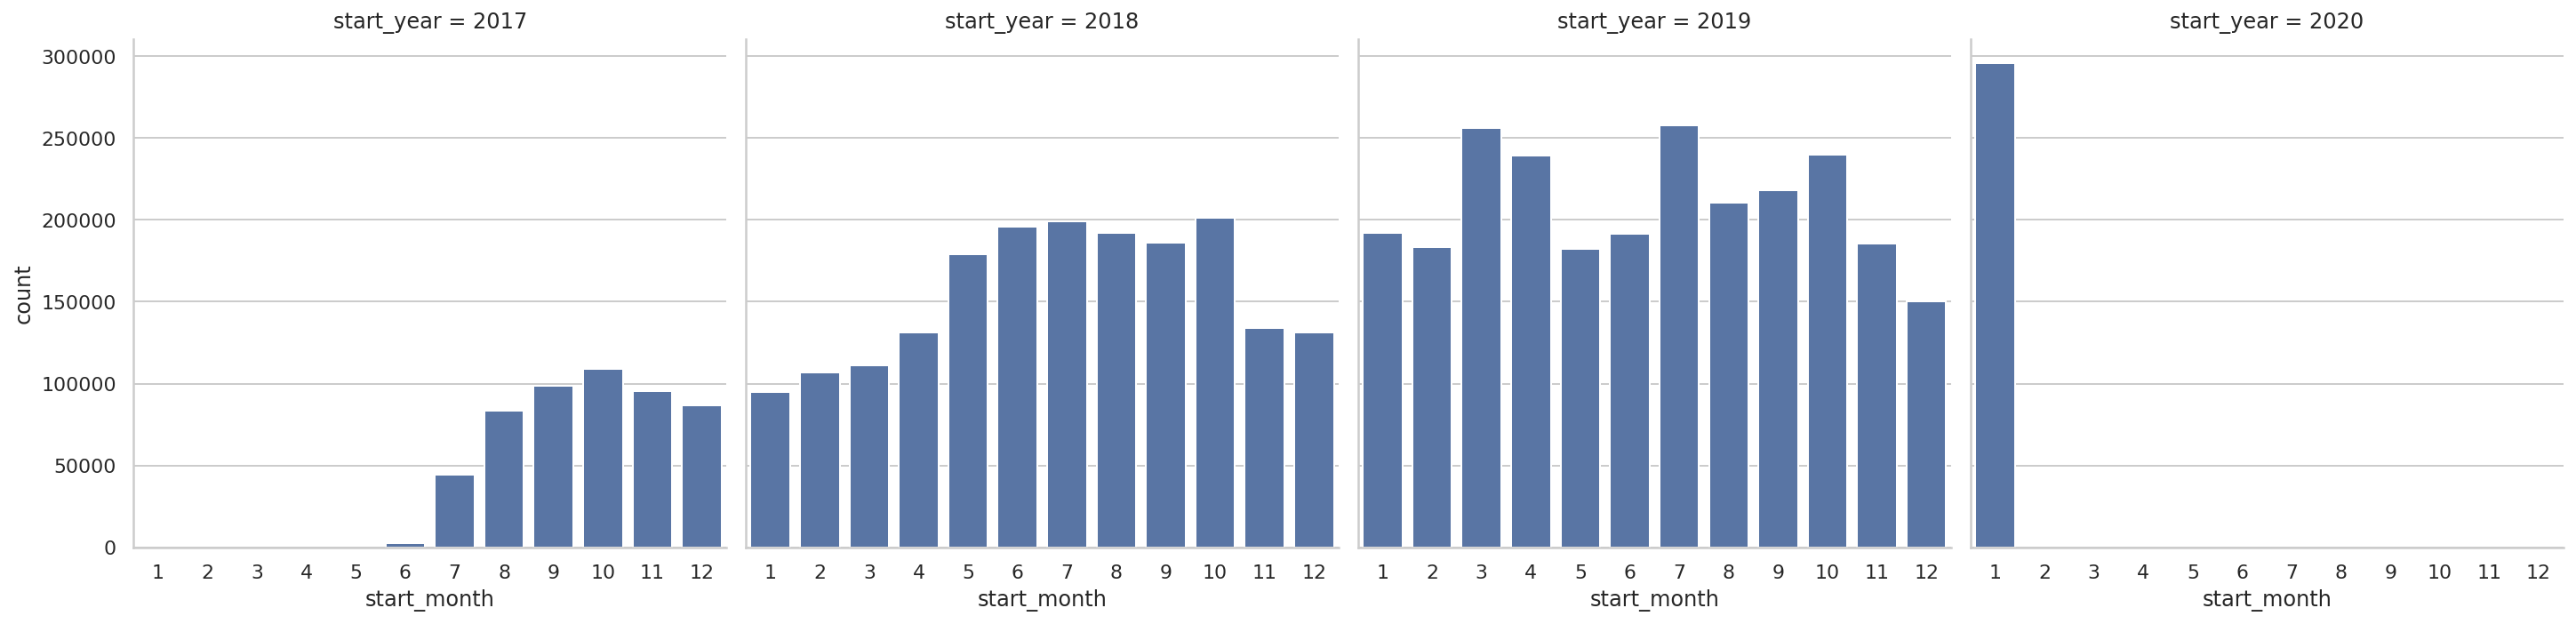

In [528]:
# monthly usage year by year
sb.catplot(data=bike,x='start_month',col='start_year',kind='count',color=sb.color_palette()[0])
plt.show()

I divided monthly usage by year and now I can understand why January usage is highest. The reason is that bike usage pattern is increasing with time so that January 2020 which is last month of the dataset is highest amount. The dataset has increasing pattern overall and there's also seasonal pattern in each year that is higher usage in spring, summer, fall.

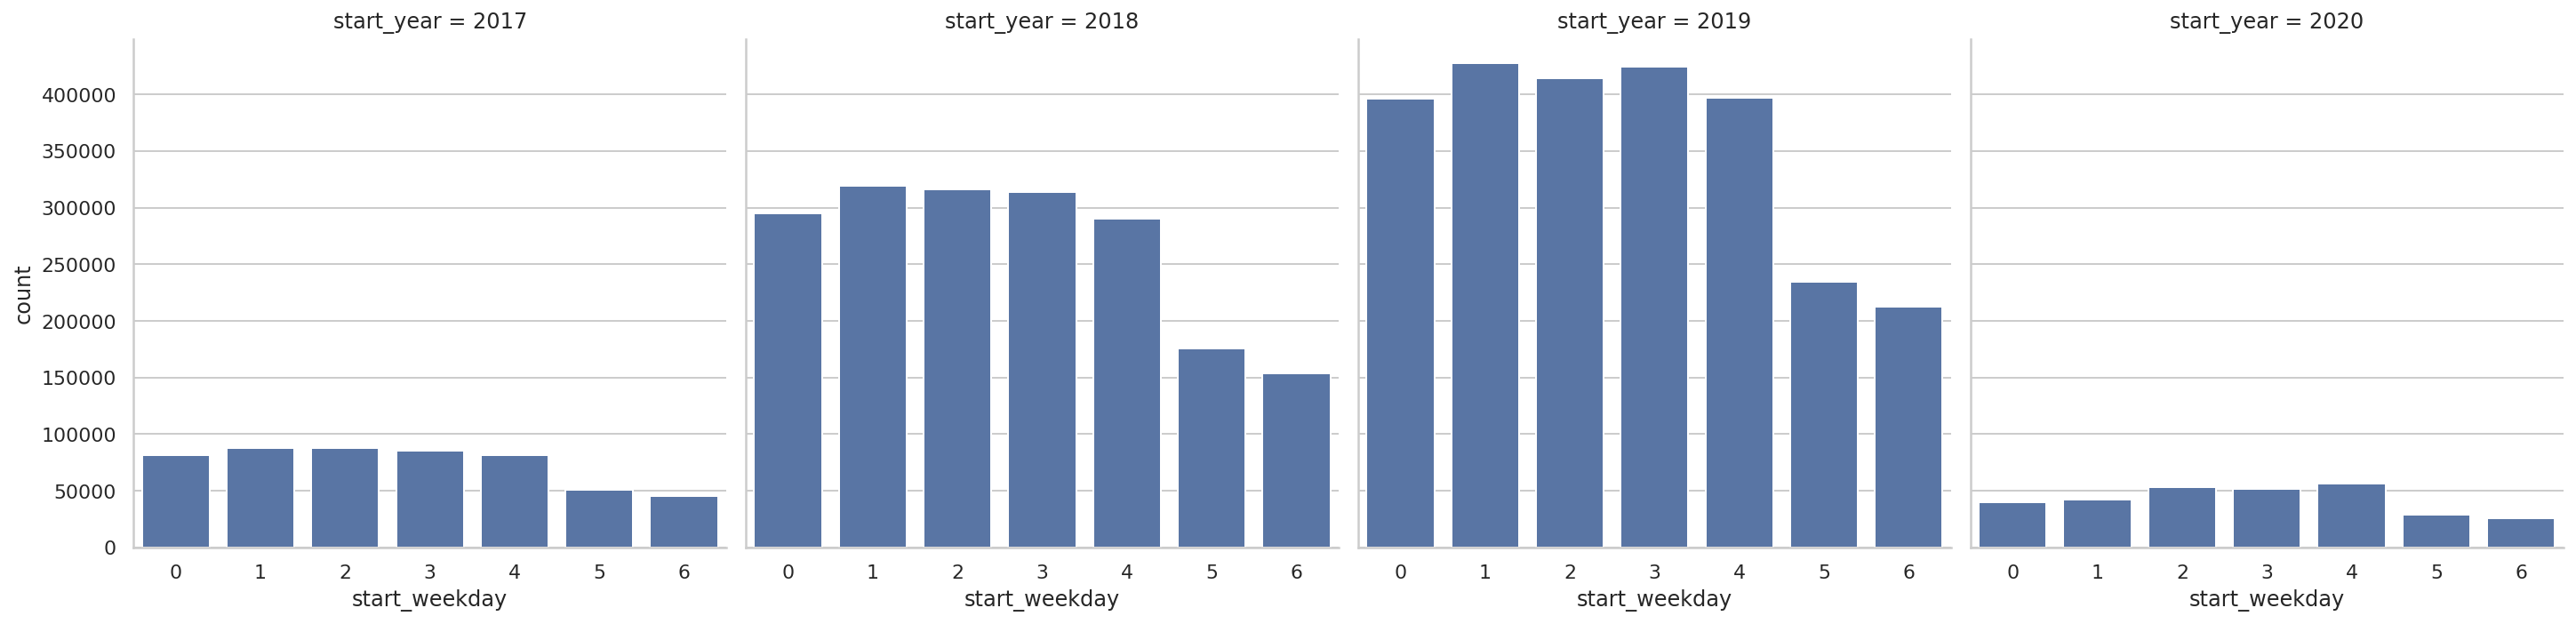

In [508]:
# weekly usage per year
# 0:Monday, 5,6:Saturday, Sunday
sb.catplot(data=bike,x='start_weekday',col='start_year',kind='count',color=sb.color_palette()[0])
plt.show()

I can see also weekly pattern and increasing pattern in every year. Year after year, usage in all day of week are increasing. Every saturday and sunday has lower than Monday through Friday with maximum almost 50%.

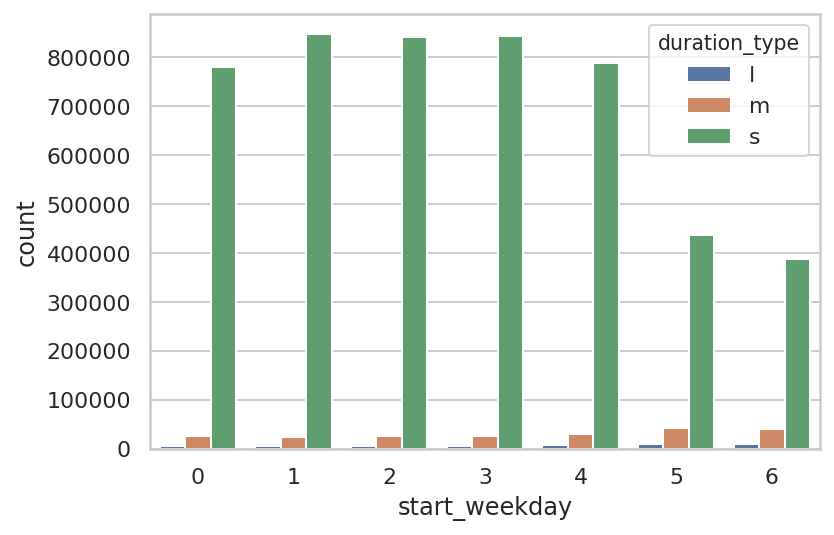

In [498]:
# 0:Monday, 5,6:Saturday, Sunday
# weekly usage by duration type
sb.countplot(data=bike,x='start_weekday',hue='duration_type');

I want to see weekly usage pattern divided by duration type. Short trip has almost 50% lower weekend than monday-friday but mid/long trip has opposite pattern. Slighty it is increasing in saturday and sunday for mid/long trip. I guess most people use short trip for commuting and mid/long trip for weekend outdoor activities  based on this pattern.

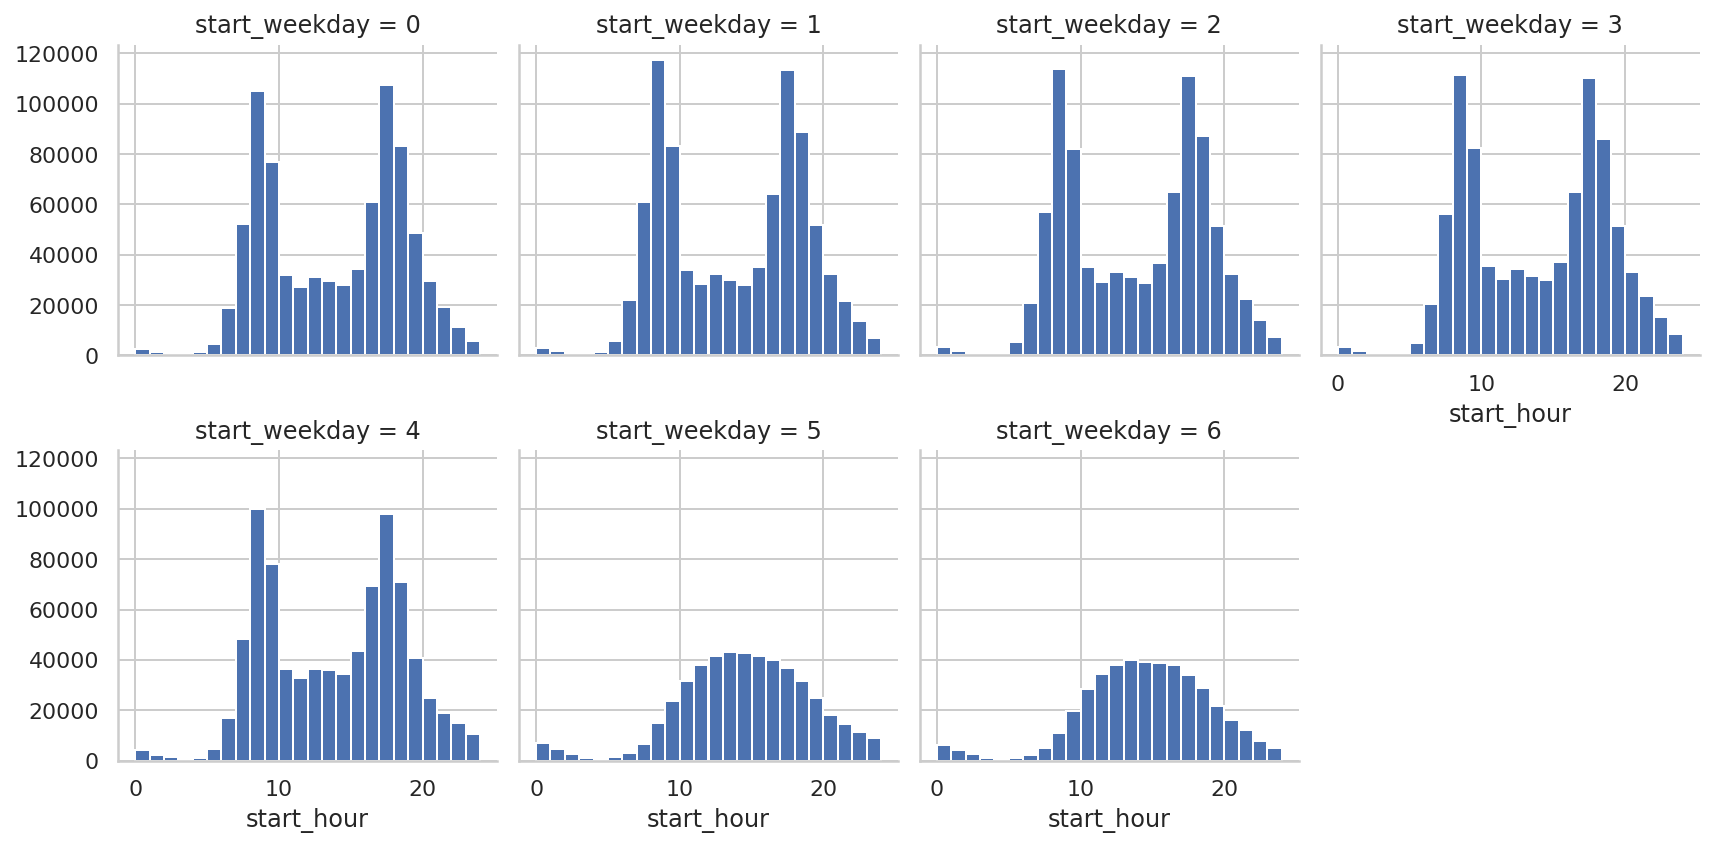

In [511]:
# countplot for trip start hour time per weekday
# hourly usage per every day of week
g=sb.FacetGrid(data=bike, col='start_weekday',col_wrap=4)
g.map(plt.hist, 'start_hour',bins=np.arange(0, 24+1,1))

This is hourly countplot per every day of week. I see bimodal on Monday through Friday but unimodal on Saturday and Sunday. Weekend peak usage is almost half of the peak(rush hour time) of weekday and weekend peak time is 1pm~2pm. So I can be more sure that people use bikes as commuting transportation during weekday and for other personal activities such as to go shopping or for physical exercise or to go to social meeting, etc during weekend.

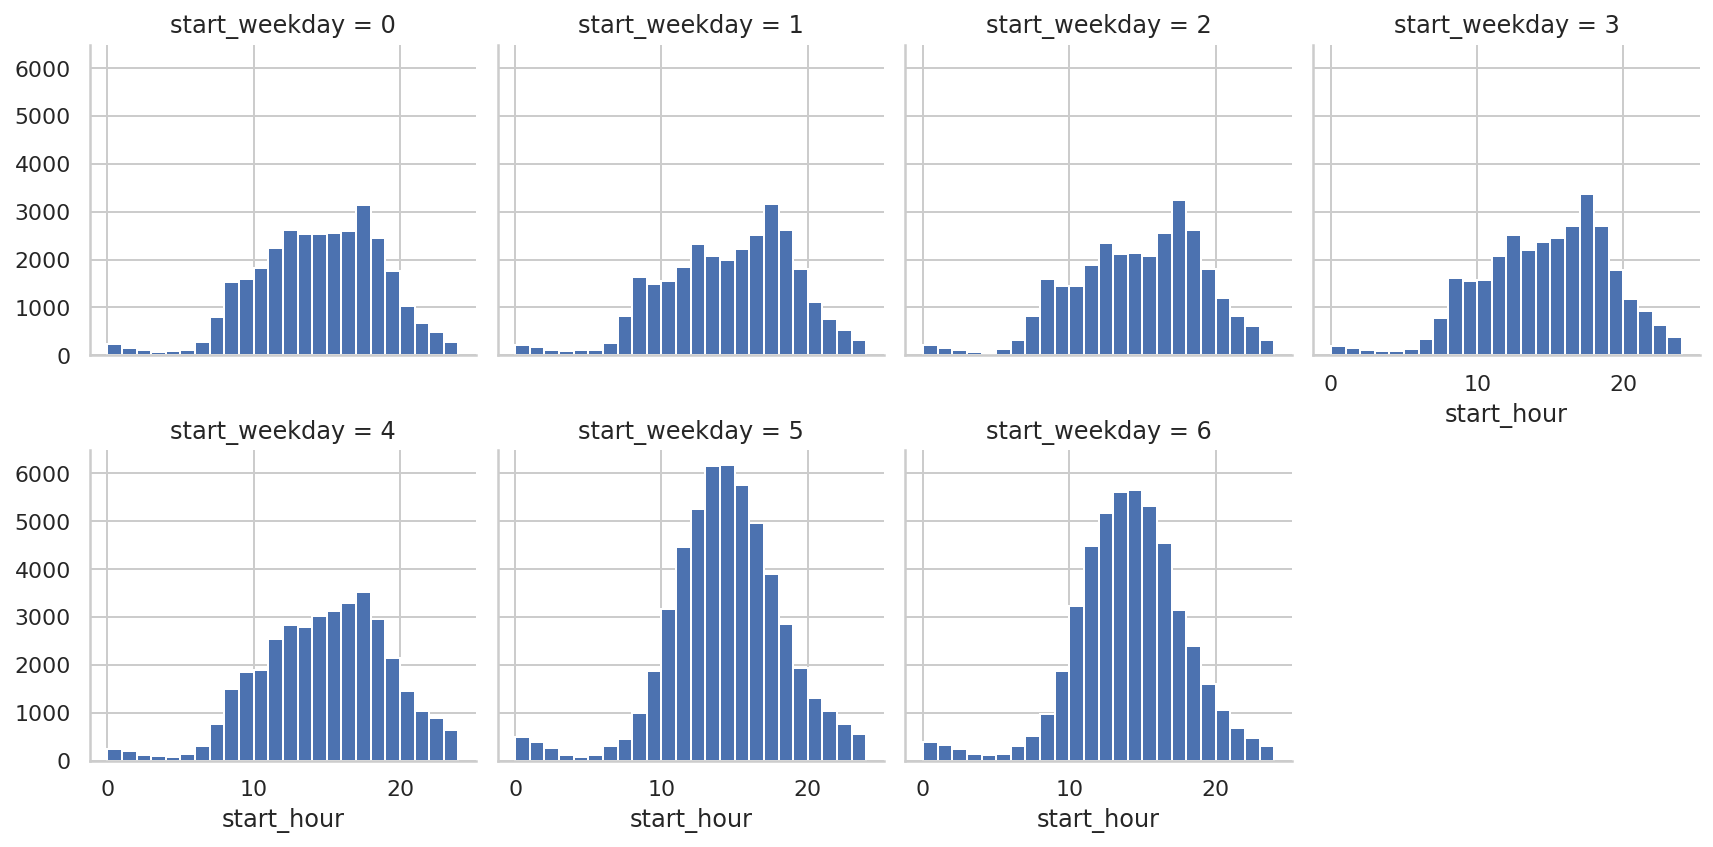

In [512]:
# hourly weekly usage for only mid/long trip
# mid/long trip means duration time is 30 min or more.
g=sb.FacetGrid(data=bike.query('duration_type=="l" or duration_type=="m"'), col='start_weekday',col_wrap=4)
g.map(plt.hist, 'start_hour',bins=np.arange(0, 24+1,1))

previously I saw mid/long trip is slightly increasing on the weekend but it was very small amount than weekday. So I plot separately here only for mid/long trip. This plot cleary shows increasing pattern on the weekend than weekday. Also mid/long trip doesn't have rush hour peak during weekday instead its peak time is around 5pm. It means most people commute with bike less than 30 min. 

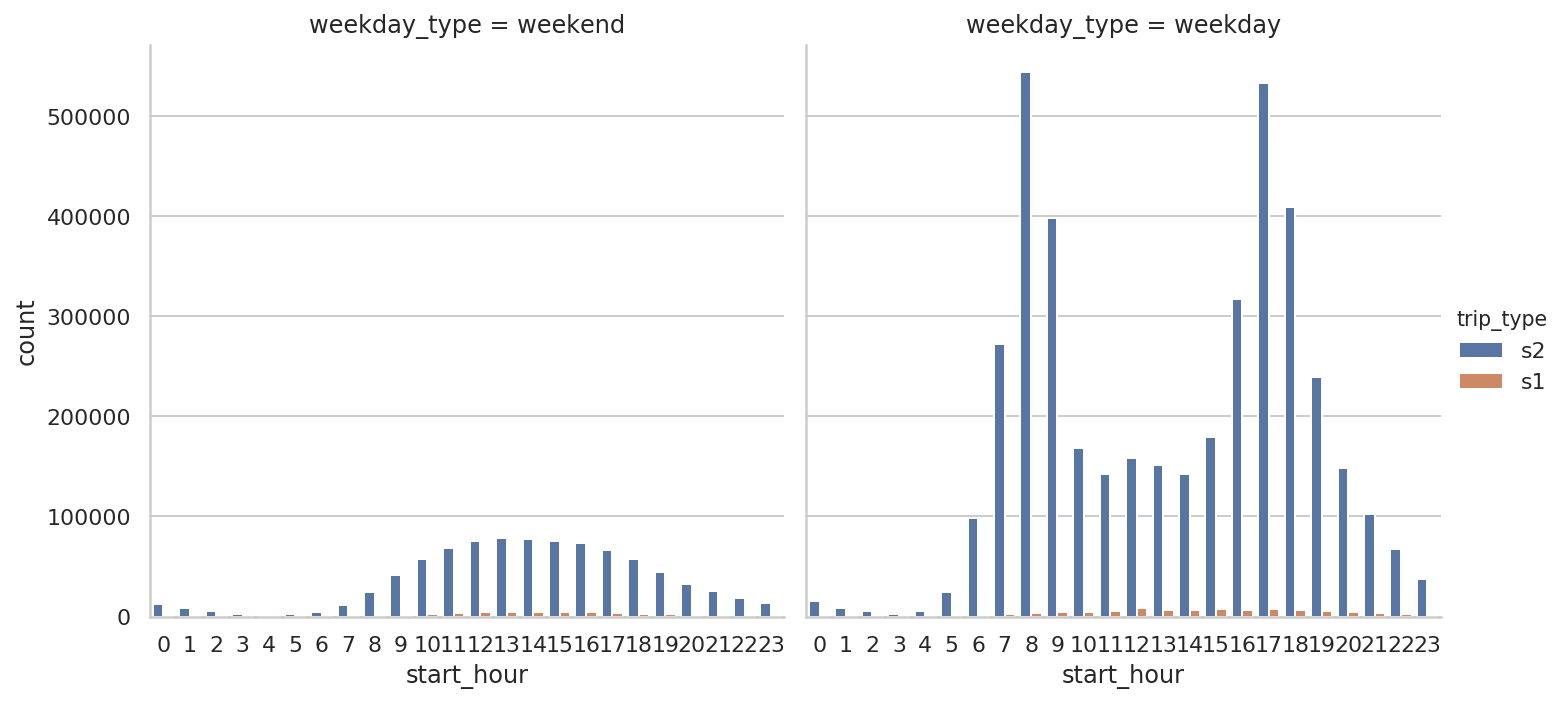

In [420]:
# hourly usage per trip type per weekday type
sb.catplot(data=bike, x='start_hour',col='weekday_type',hue='trip_type',kind='count')
plt.show()

s1 type means a trip ended at the start station. s2 type means a trip ended at the different station. Most usage is s2 type and it is showing weekly pattern which is rush hour peak during weekday and daylight time peak during weekend. S1 type trip is very small amount and it looks like daylight time peak during weekday and weekend but it seems not affect to overall pattern.  

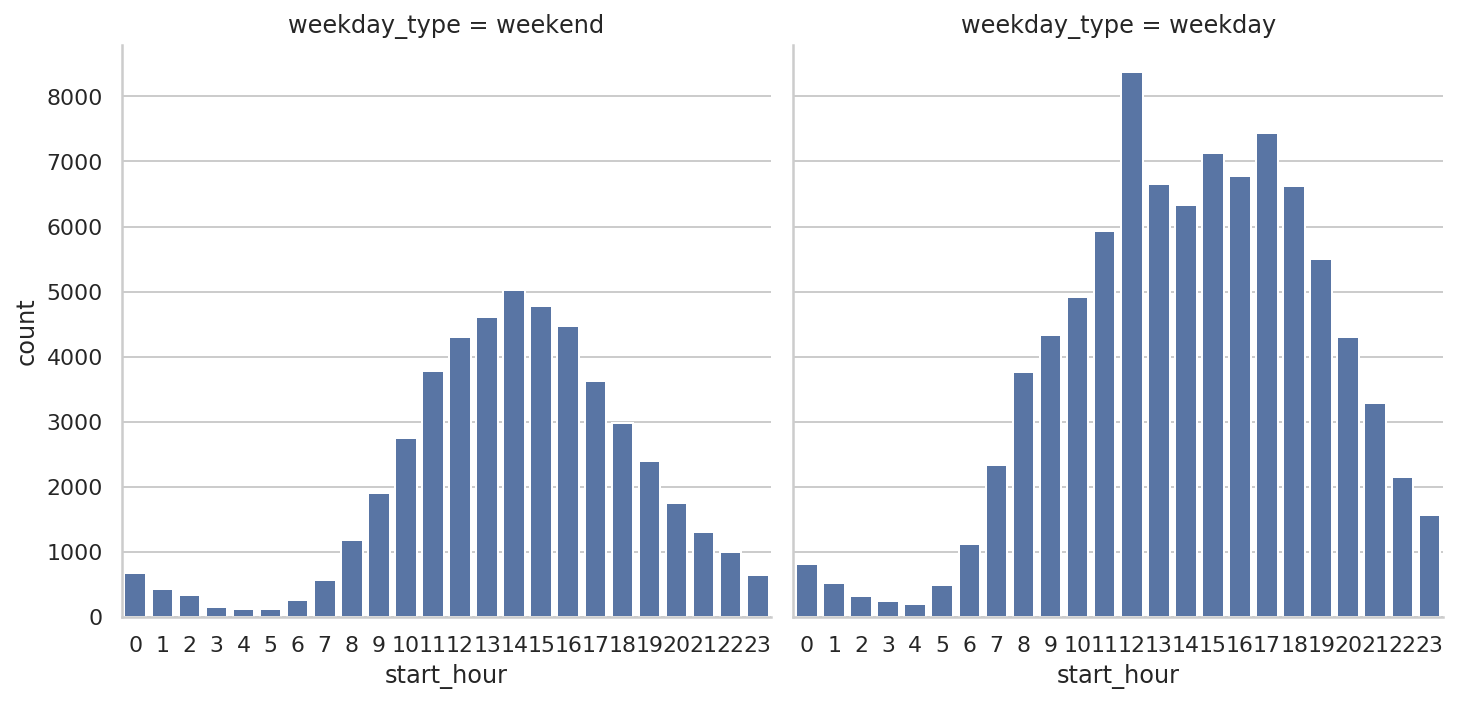

In [536]:
#  hourly weekly usage only for 's1' trip (return trip)
sb.catplot(data=bike.query('trip_type=="s1"'), x='start_hour',col='weekday_type',kind='count',color=sb.color_palette()[0])
plt.show()

I just want to see s1 trip type usage plot little more clearly. It has daylight time peak pattern during weekday and weekend but slightly weekday usage is greater than weekend usage.

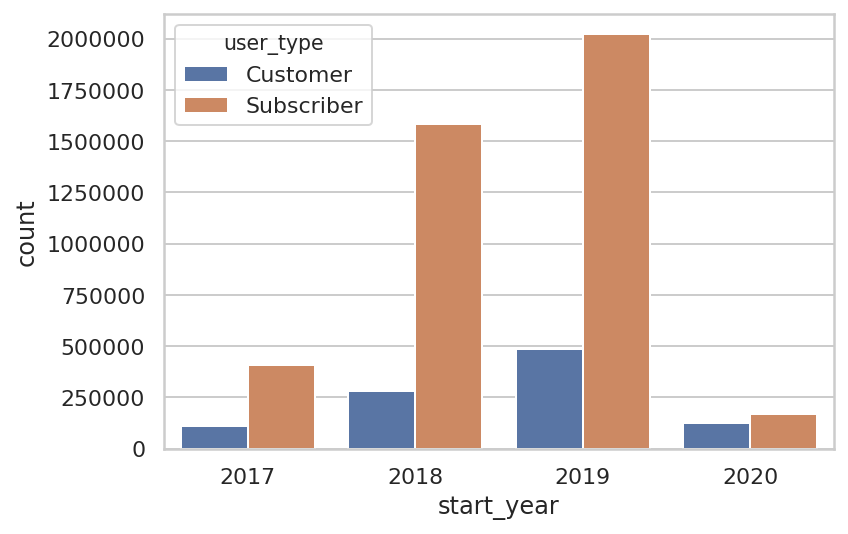

In [429]:
# usage per user type yearly
sb.countplot(data=bike,x='start_year',hue='user_type')
plt.show()

Year after year, both subscriber and casual user are increasing however subscriber is way more a lot than casual user. It looks like decreased in 2020 but this is because the dataset doesn't include full year observations for 2020. I guess bot user type will be increasing at the end of 2020 with this pattern.

In [579]:
bike.query('trip_type=="s1" and weekday_type=="weekday"').start_station_name.value_counts()[:10]

The Embarcadero at Sansome St                         3025
San Francisco Ferry Building (Harry Bridges Plaza)    2178
3rd St at Townsend St                                 2015
San Francisco Caltrain (Townsend St at 4th St)        1819
El Embarcadero at Grand Ave                           1411
Central Ave at Fell St                                1327
Fell St at Stanyan St                                 1173
Powell St BART Station (Market St at 4th St)          1103
Powell St BART Station (Market St at 5th St)          1085
Berry St at 4th St                                    1040
Name: start_station_name, dtype: int64

In [459]:
bike.query('trip_type=="s1" and weekday_type=="weekend"').start_station_name.value_counts()[:5]

The Embarcadero at Sansome St                         1980
Central Ave at Fell St                                1733
San Francisco Ferry Building (Harry Bridges Plaza)    1616
Fell St at Stanyan St                                 1384
El Embarcadero at Grand Ave                           1164
Name: start_station_name, dtype: int64

In [412]:
print(bike.query('7 <= start_hour <= 9 and weekday_type=="weekday"').start_station_name.value_counts()[:5])
print(bike.query('7 <= start_hour <= 9 and weekday_type=="weekday"').end_station_name.value_counts()[:5])

San Francisco Caltrain (Townsend St at 4th St)               44659
San Francisco Caltrain Station 2  (Townsend St at 4th St)    43789
San Francisco Ferry Building (Harry Bridges Plaza)           32579
Howard St at Beale St                                        28739
Berry St at 4th St                                           26969
Name: start_station_name, dtype: int64
Montgomery St BART Station (Market St at 2nd St)             40116
Berry St at 4th St                                           35323
San Francisco Caltrain Station 2  (Townsend St at 4th St)    27901
Market St at 10th St                                         27229
San Francisco Caltrain (Townsend St at 4th St)               25616
Name: end_station_name, dtype: int64


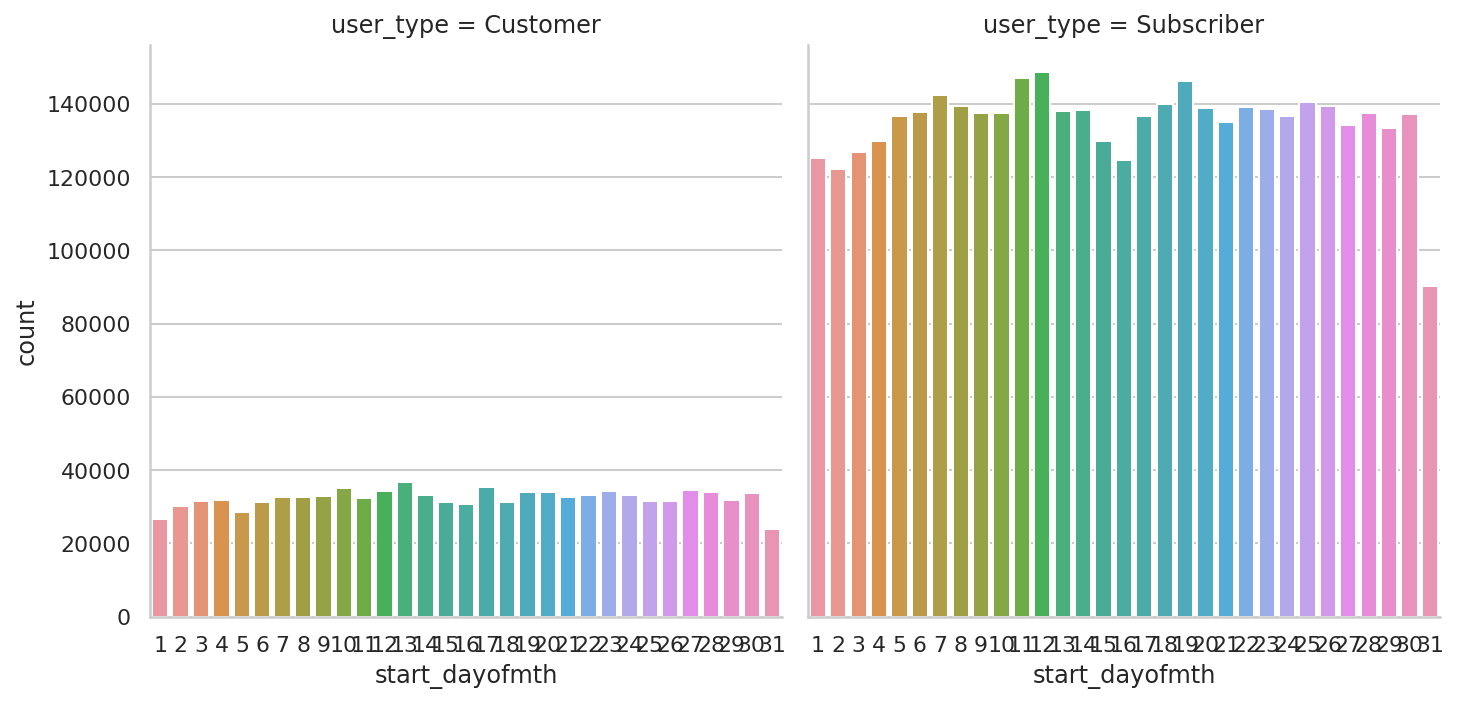

In [577]:
# usage by day of month per user type
sb.catplot(data=bike,x='start_dayofmth',col='user_type',kind='count')
plt.show()

This plot is showing daily usage pattern per month per user type. For casual user their daily usage looks almost constant and subscriber user have decreasing point at 1st through 4th day of the month and middle of the day which is 15th and 16th.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Bike usage keep increasing since June 2017 until last data point, January 2020. With this pattern I expect this increasing keeps going during whole 2020. Also from spring, summer and fall season has higher usage than winter or early spring. Weekday and weekend usage is also different. During weekday usage peak is commuting time and during weekend usage is a lot less than weekday but there's daylight time pattern(bell shape with 1-2pm peak). Short trip (less than 30 min) is used in overwhelmingly great number during the commuting time of the weekday and mid/long trip is used during weekend or noon through afternoon on the weekday with number less than 1 tenth of short trip.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In user type, overall number of user is increasing pattern but numer of subscriber is always big number than casual user. 
Most trip is s2 type. s1 type trip is so small amount that it seems not affect to the main data pattern.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

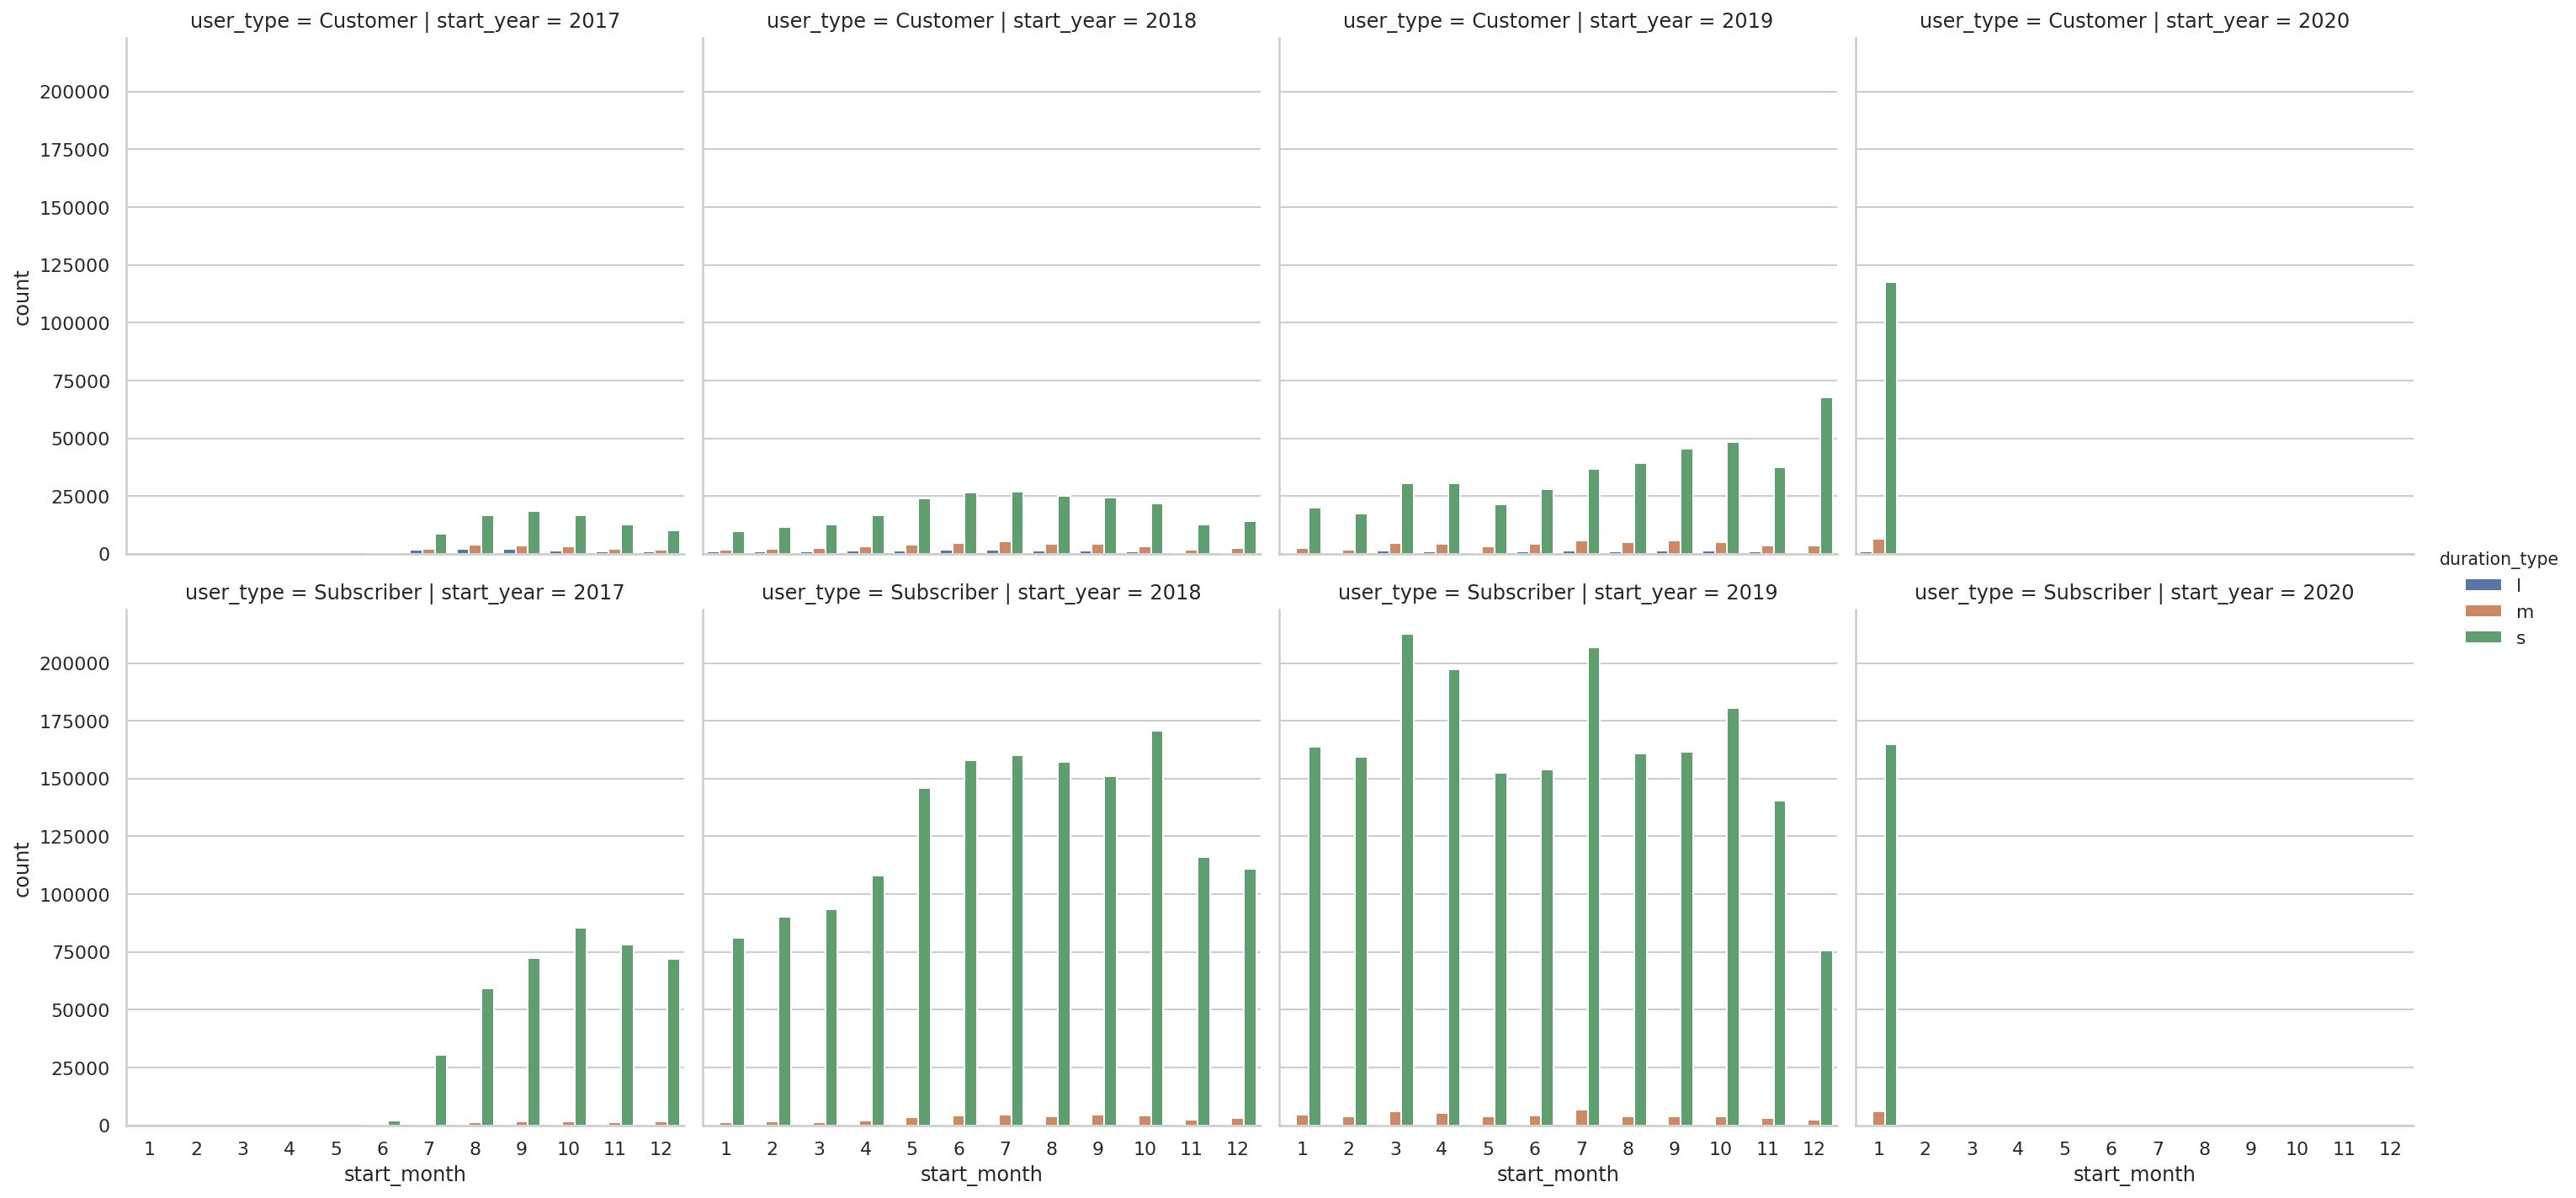

In [568]:
# monthly usage by duration type by user type year by year
sb.catplot(data=bike,x='start_month',hue='duration_type',col='start_year',kind='count',row='user_type')
plt.show()

This plot shows monthly usage by duration type by user type per year. Generally all duration trips have increasing and seasonal trend which is having higher usage in the spring, summer and fall. Especially short trip is abundantly high amount than other longer trip types so its trend decides overall trend. In the casual user, proportion of mid/long trip is higher than subscriber's.

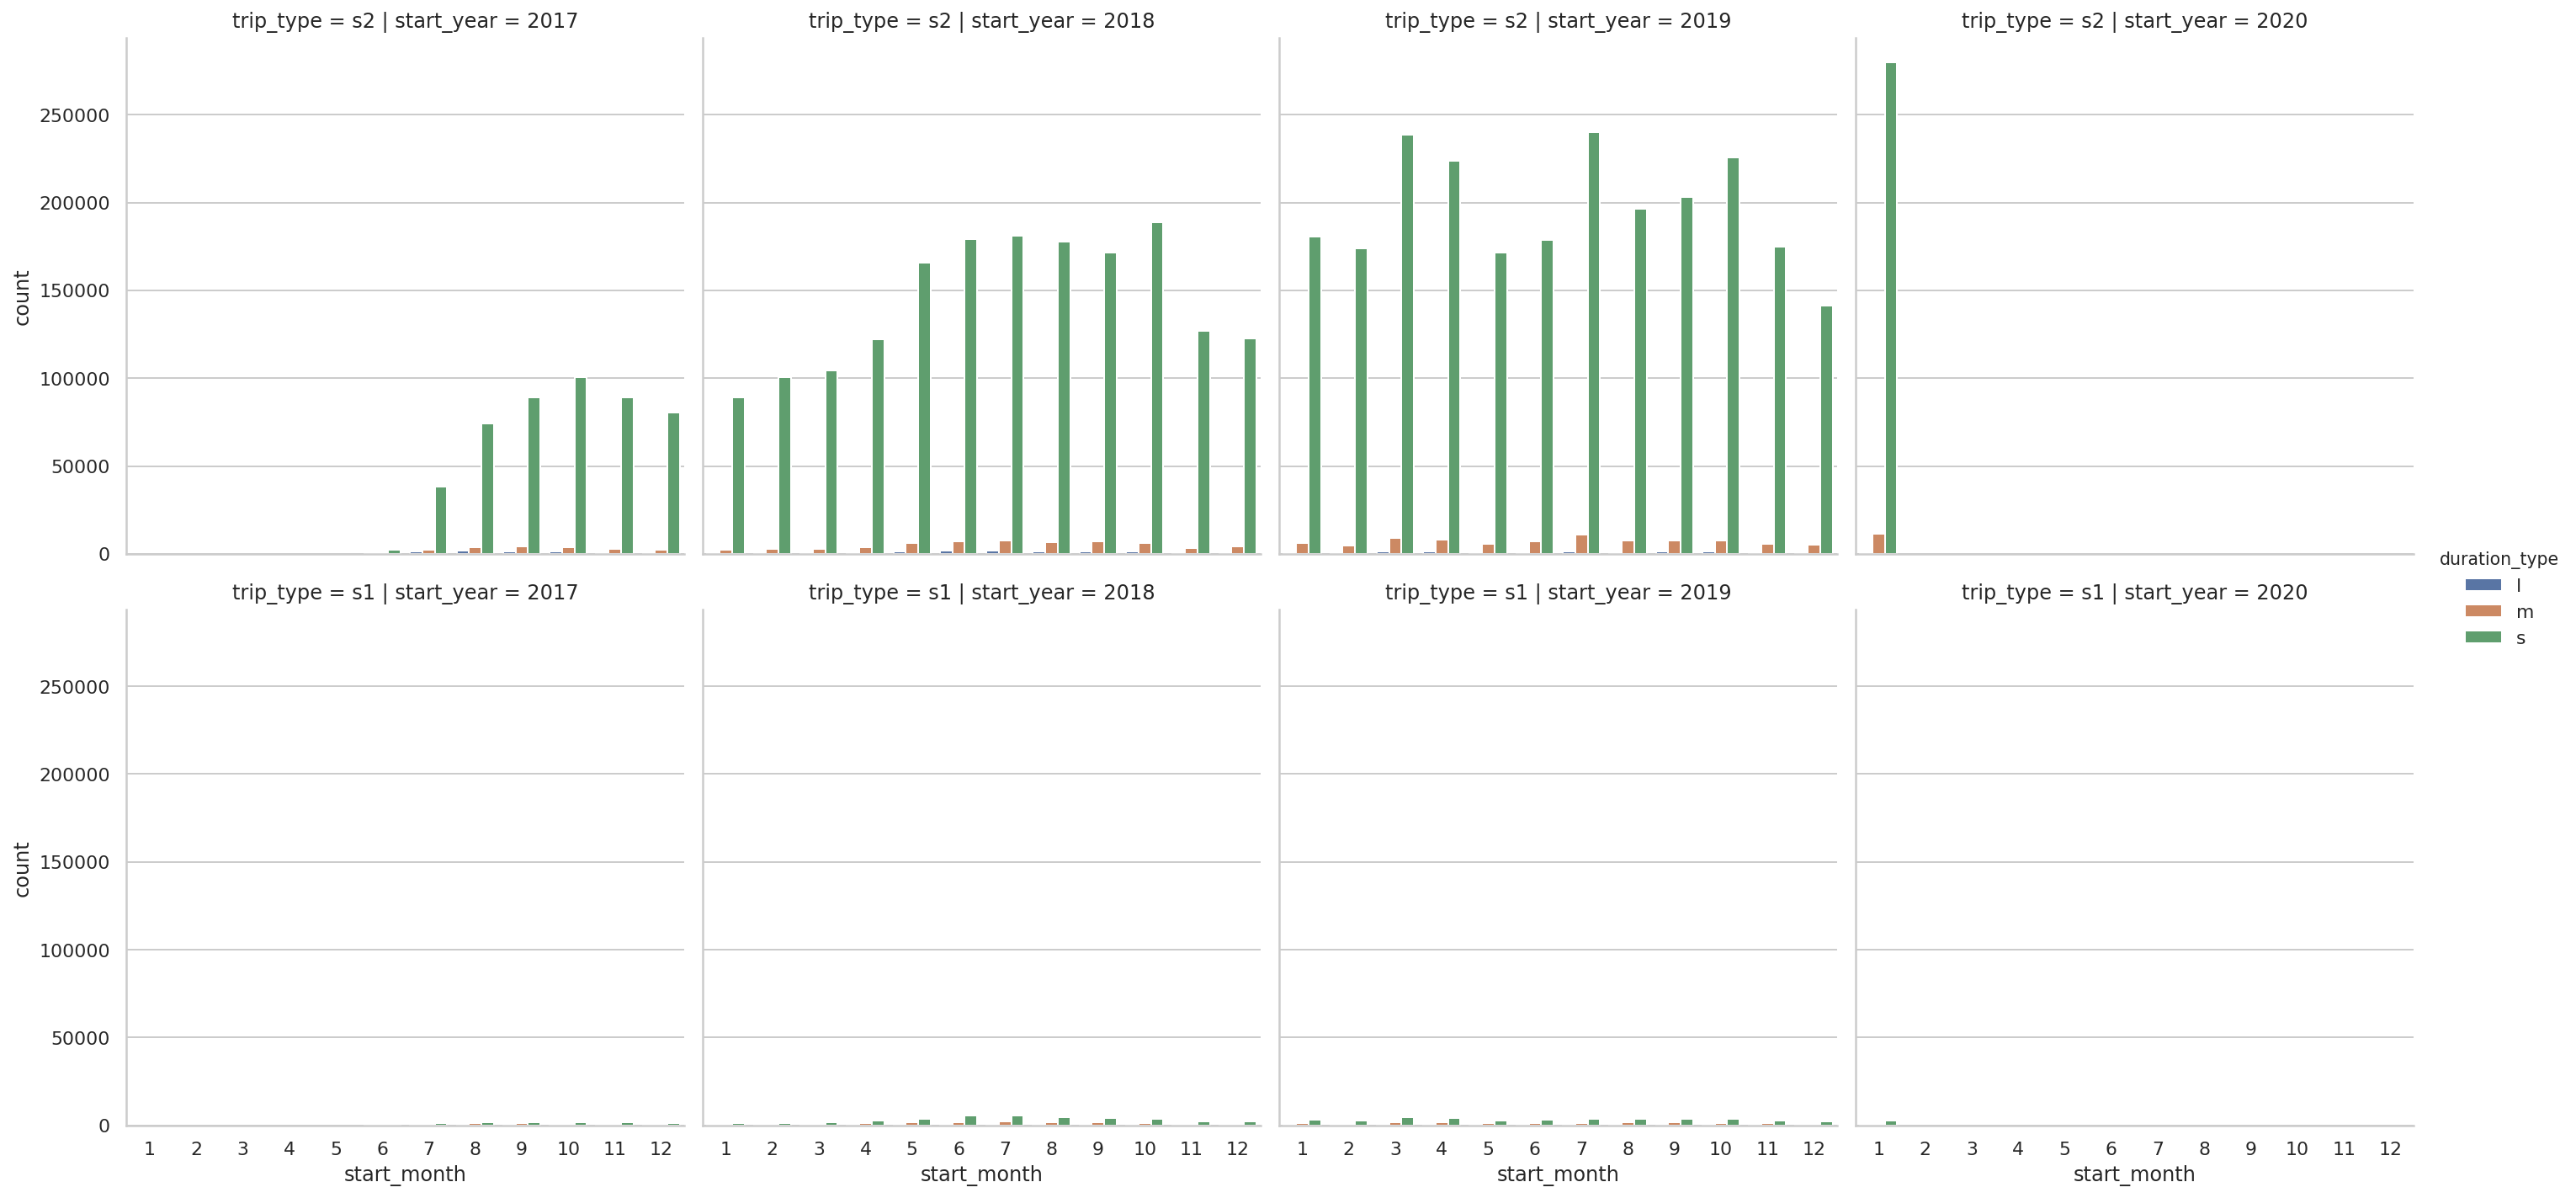

In [569]:
# monthly usage by duration type by trip type year by year
sb.catplot(data=bike,x='start_month',hue='duration_type',col='start_year',kind='count',row='trip_type')
plt.show()

It looks like duration type feature and trip type feature and season have not relationship in this plot. s1 trip is always extremely small than s2 trip. 

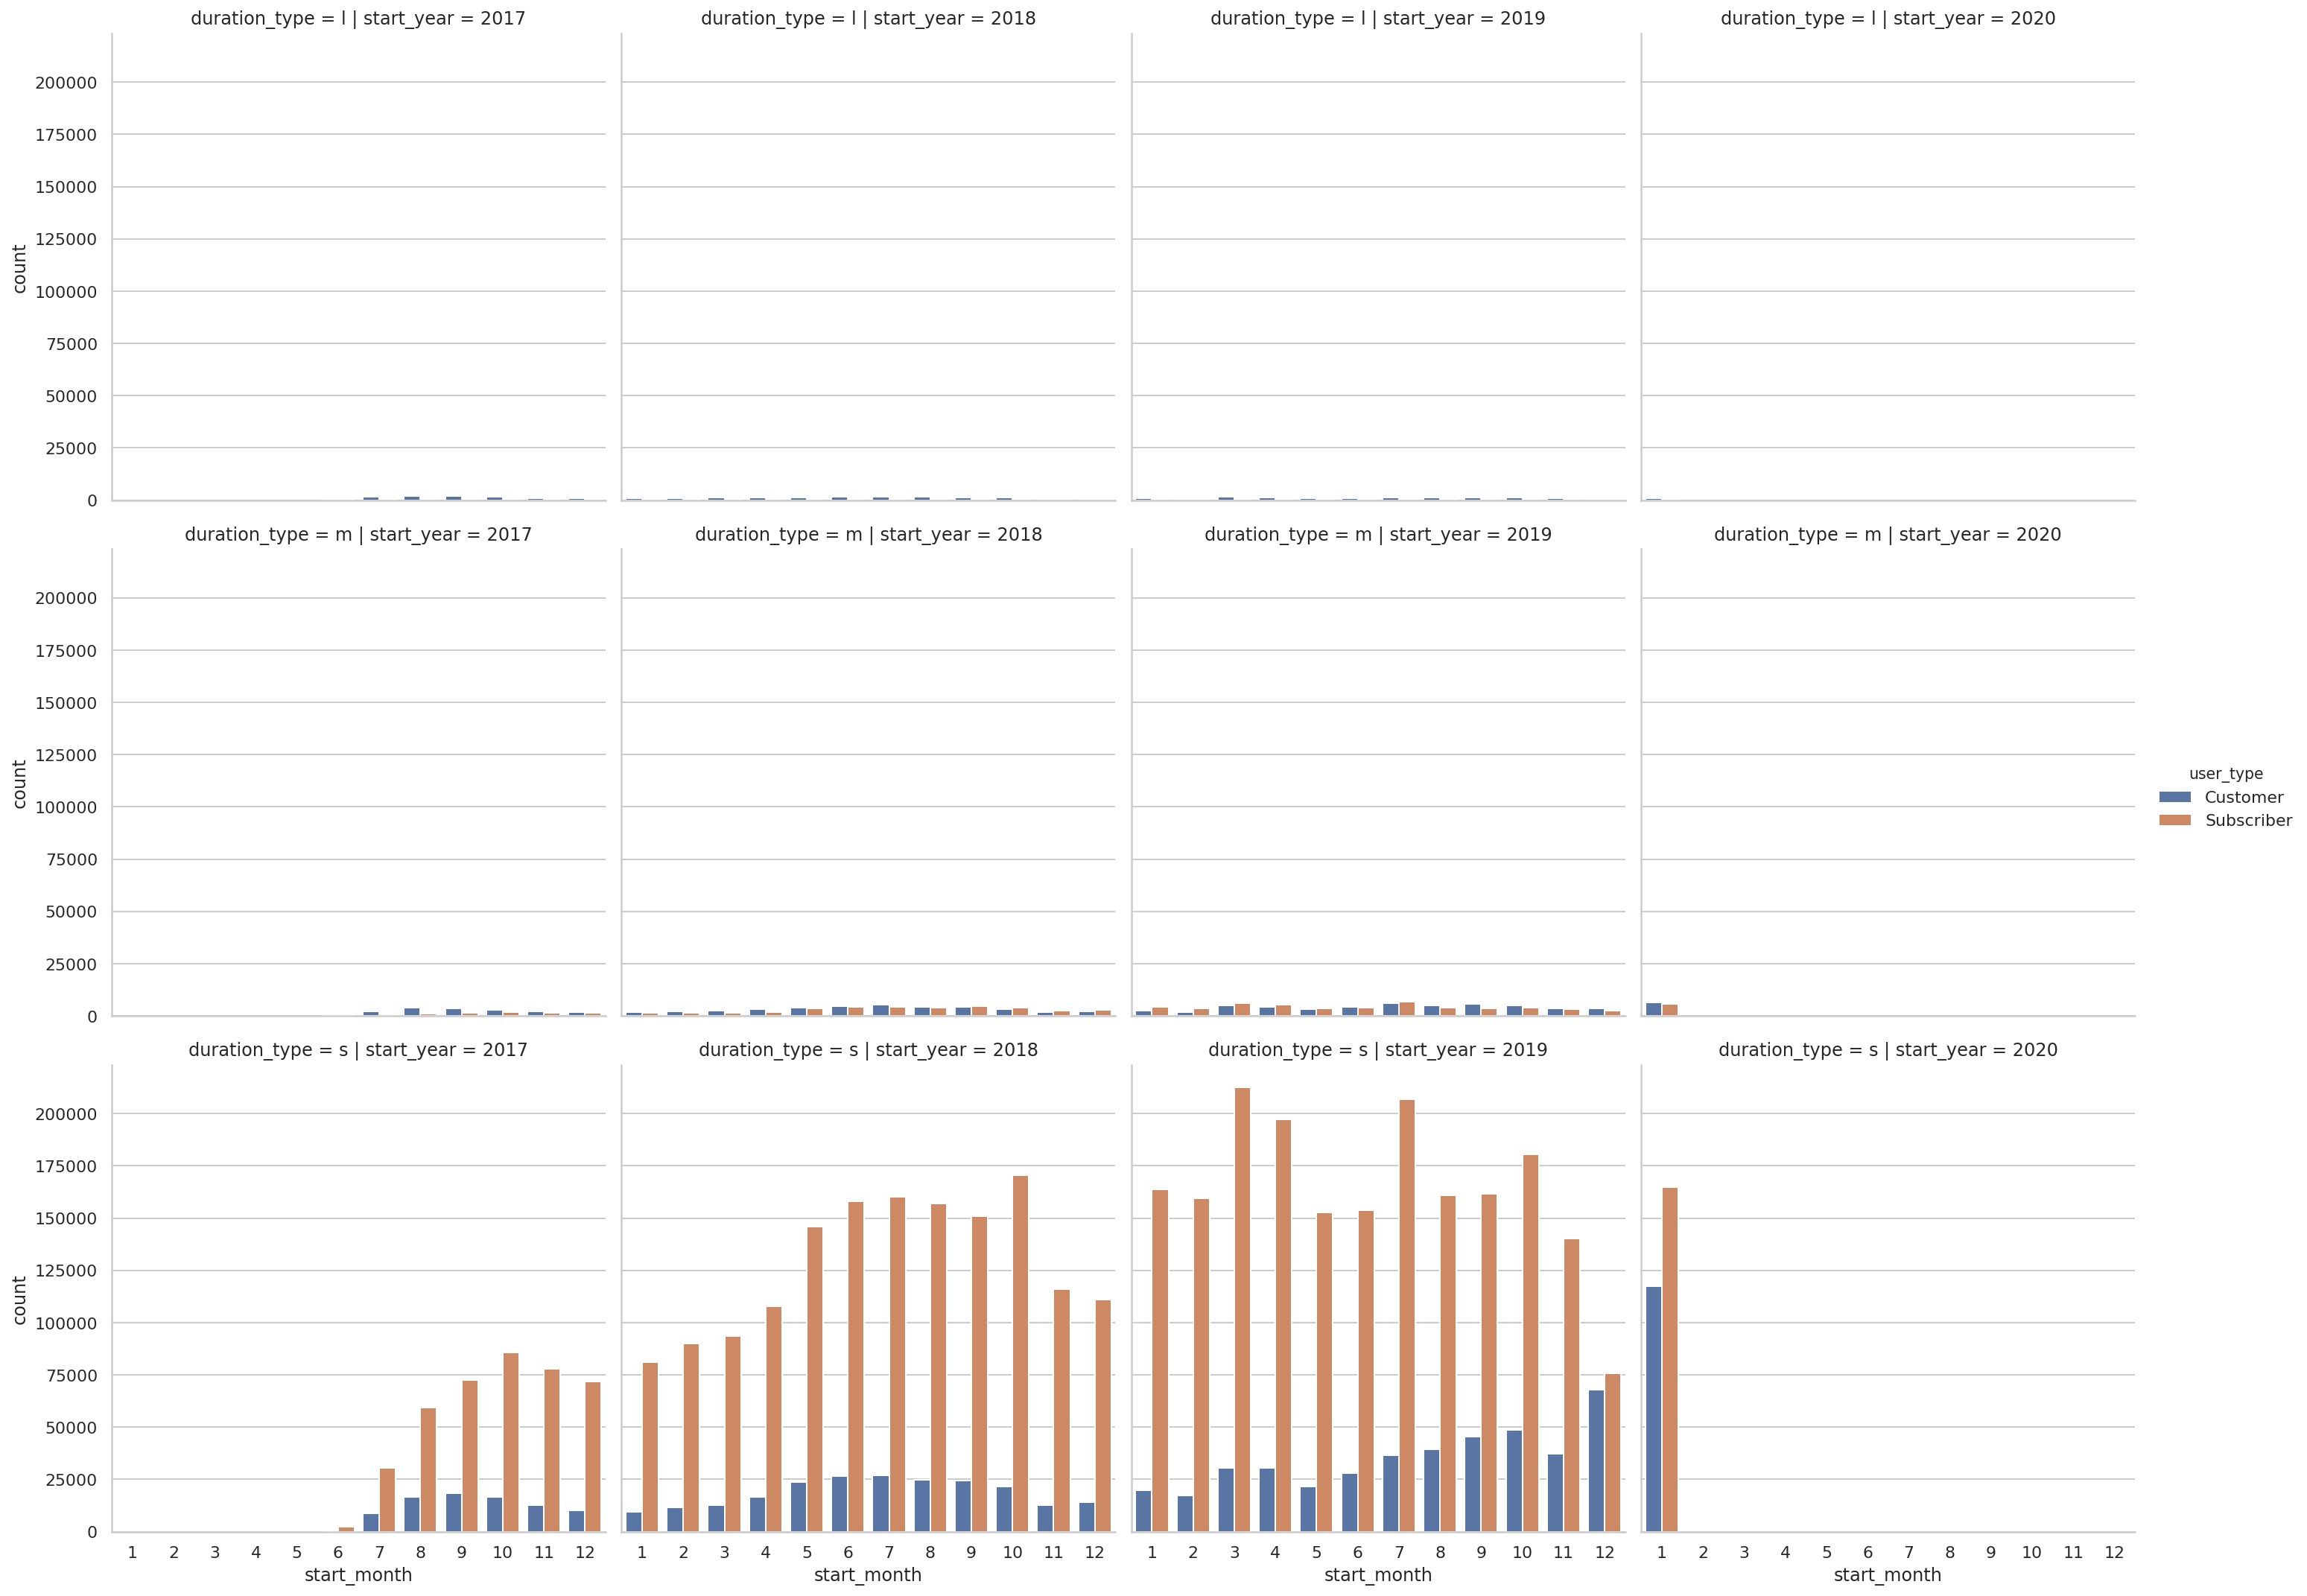

In [570]:
# monthly usage by user type by duration type year by year
sb.catplot(data=bike,x='start_month',hue='user_type',col='start_year',kind='count',row='duration_type')
plt.show()

Longer trip type higher proportion of casual user in this plot. In opposite saying, most member users use short trip biking.

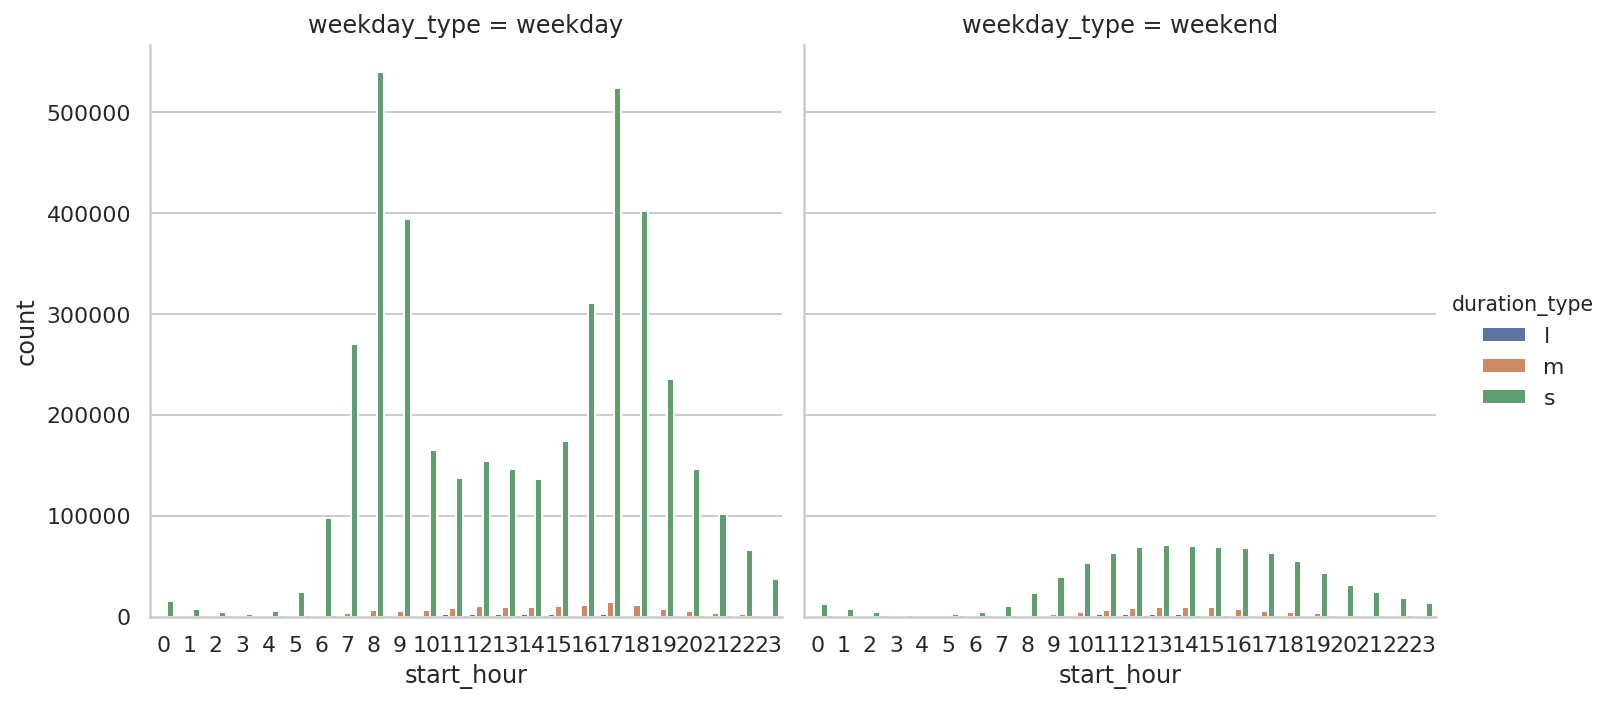

In [538]:
# 각 시간대별,weekday type별, 단,중,장거리 trip 이용량비교(단거리와 중장거리의 이용량의 큰 차이때문에 따로 볼 필요가 있음.) (multi)
# hourly usage by weekday type by duration type
sb.catplot(data=bike,x='start_hour',hue='duration_type',kind='count', col='weekday_type',col_order=['weekday','weekend'])
plt.show()

As I already found before short trip type is usually used for commuting during weekday due to it has bimodal and used less amount during weekend. Mid trip is very small amount but it looks like constant trend in usage on the weekday and weekend which is daylight time pattern.

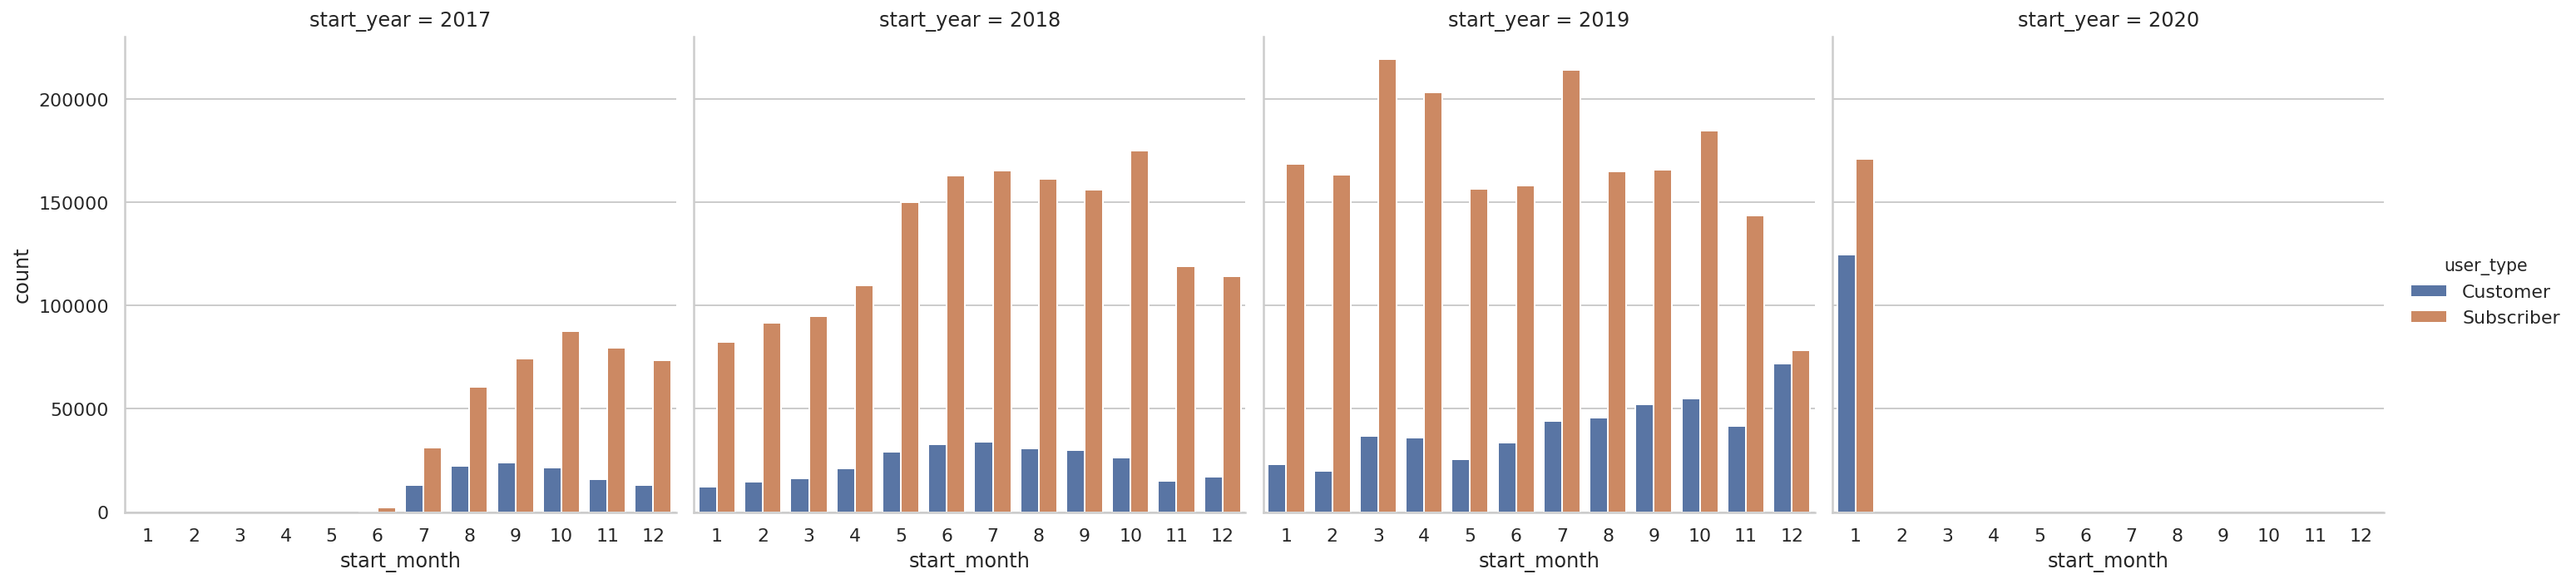

In [470]:
# monthly usage by user type per year
sb.catplot(data=bike,x='start_month',col='start_year',kind='count',hue='user_type')
plt.show()

Over time both user type has been increased and more in the last month, Jan 2020 even it's winter season. But I see Jan 2019 also has increase only in member user than the previous month even it's winter. People make a new year resolution such as more bike riding from new year?

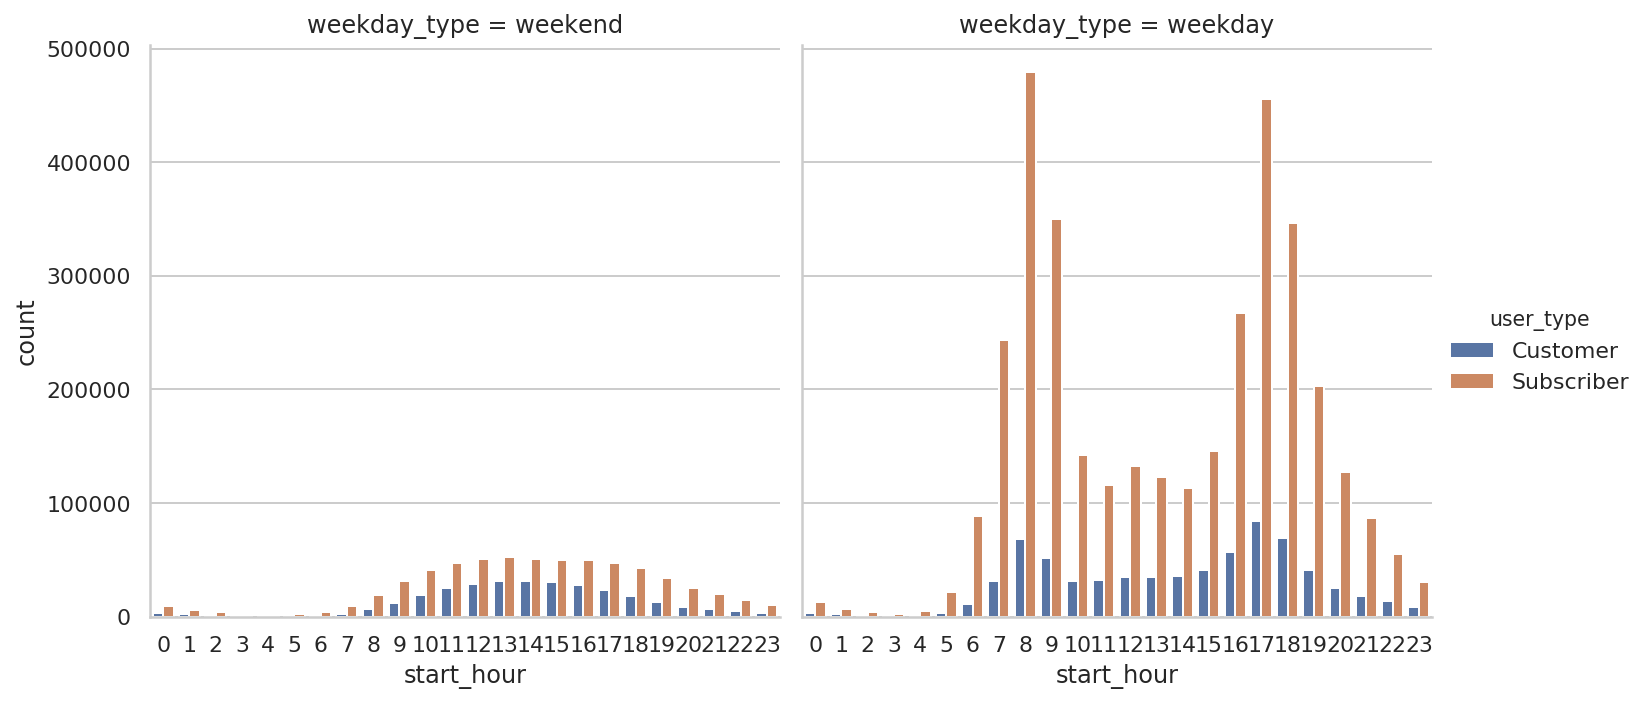

In [473]:
# 하루 시간대에서 user type별 사용량이 어떻게 다른지.
# hourly usage by user type by weekday type
sb.catplot(data=bike, x='start_hour',col='weekday_type',hue='user_type',kind='count')
plt.show()

Hourly usage trend and weekend trend is same both for subscriber or casual user. Only there's difference in amount, subscriber has very high usage especially during weekday.

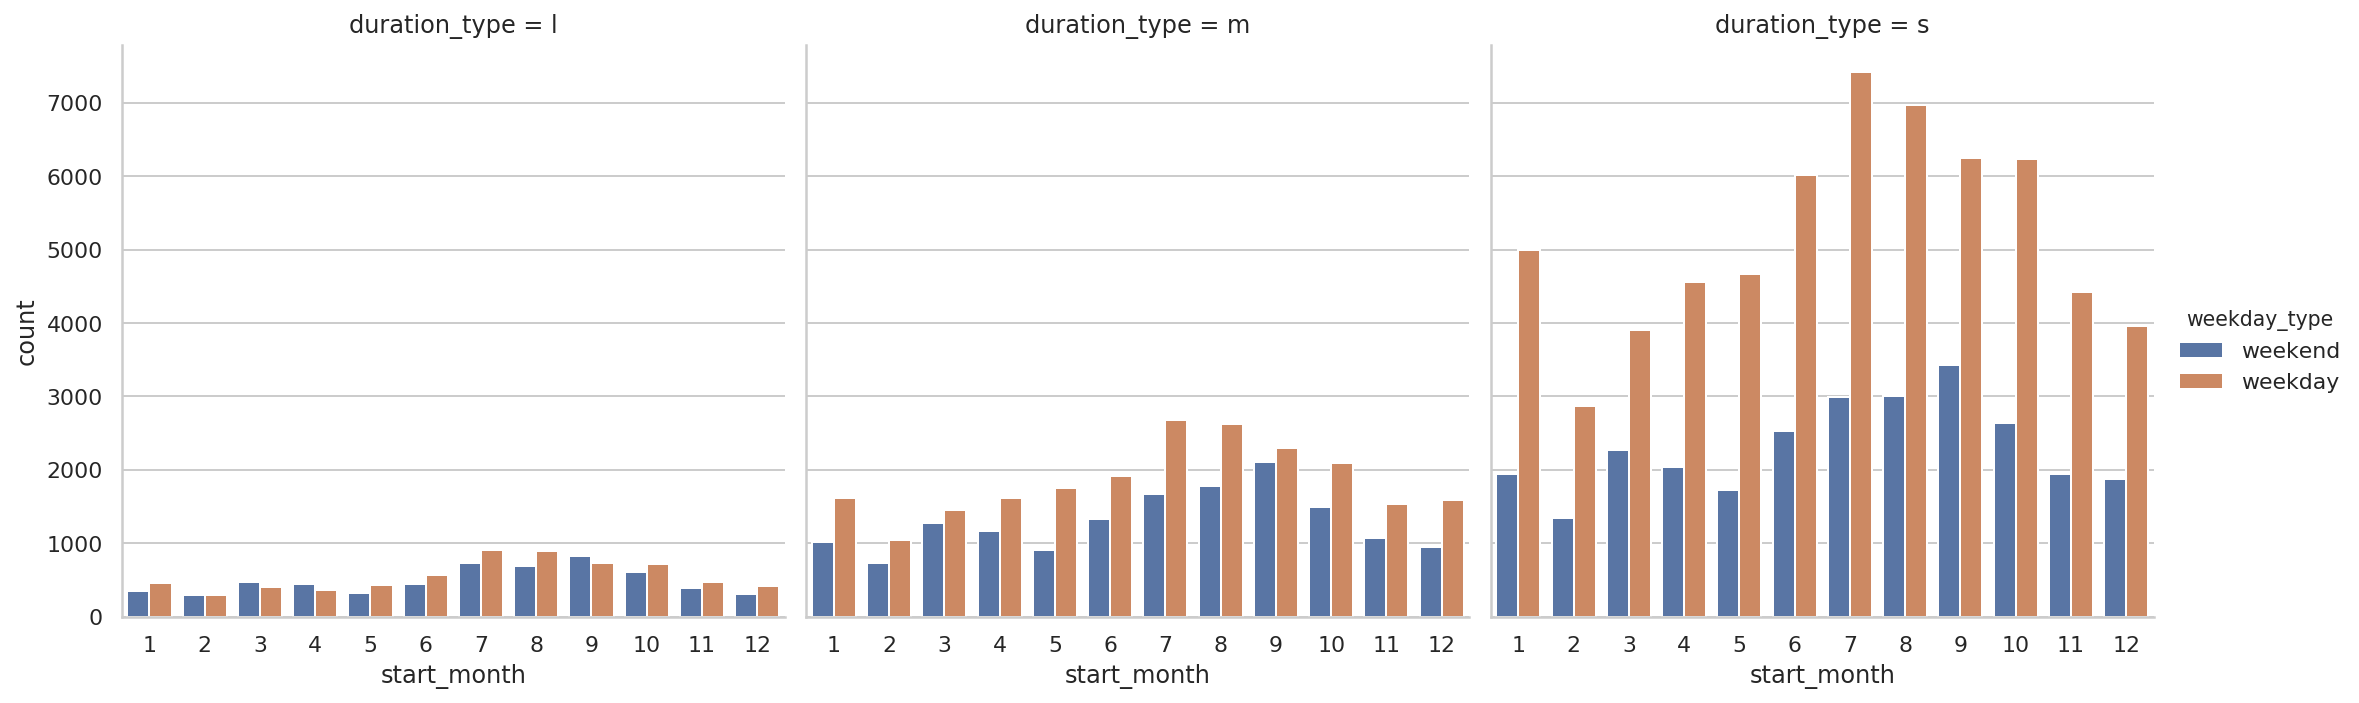

In [524]:
# monthly usage by weekday type by duration type only for s1 trip type
sb.catplot(data=bike.query('trip_type=="s1"'), x='start_month',hue='weekday_type',col='duration_type',kind='count')
plt.show()

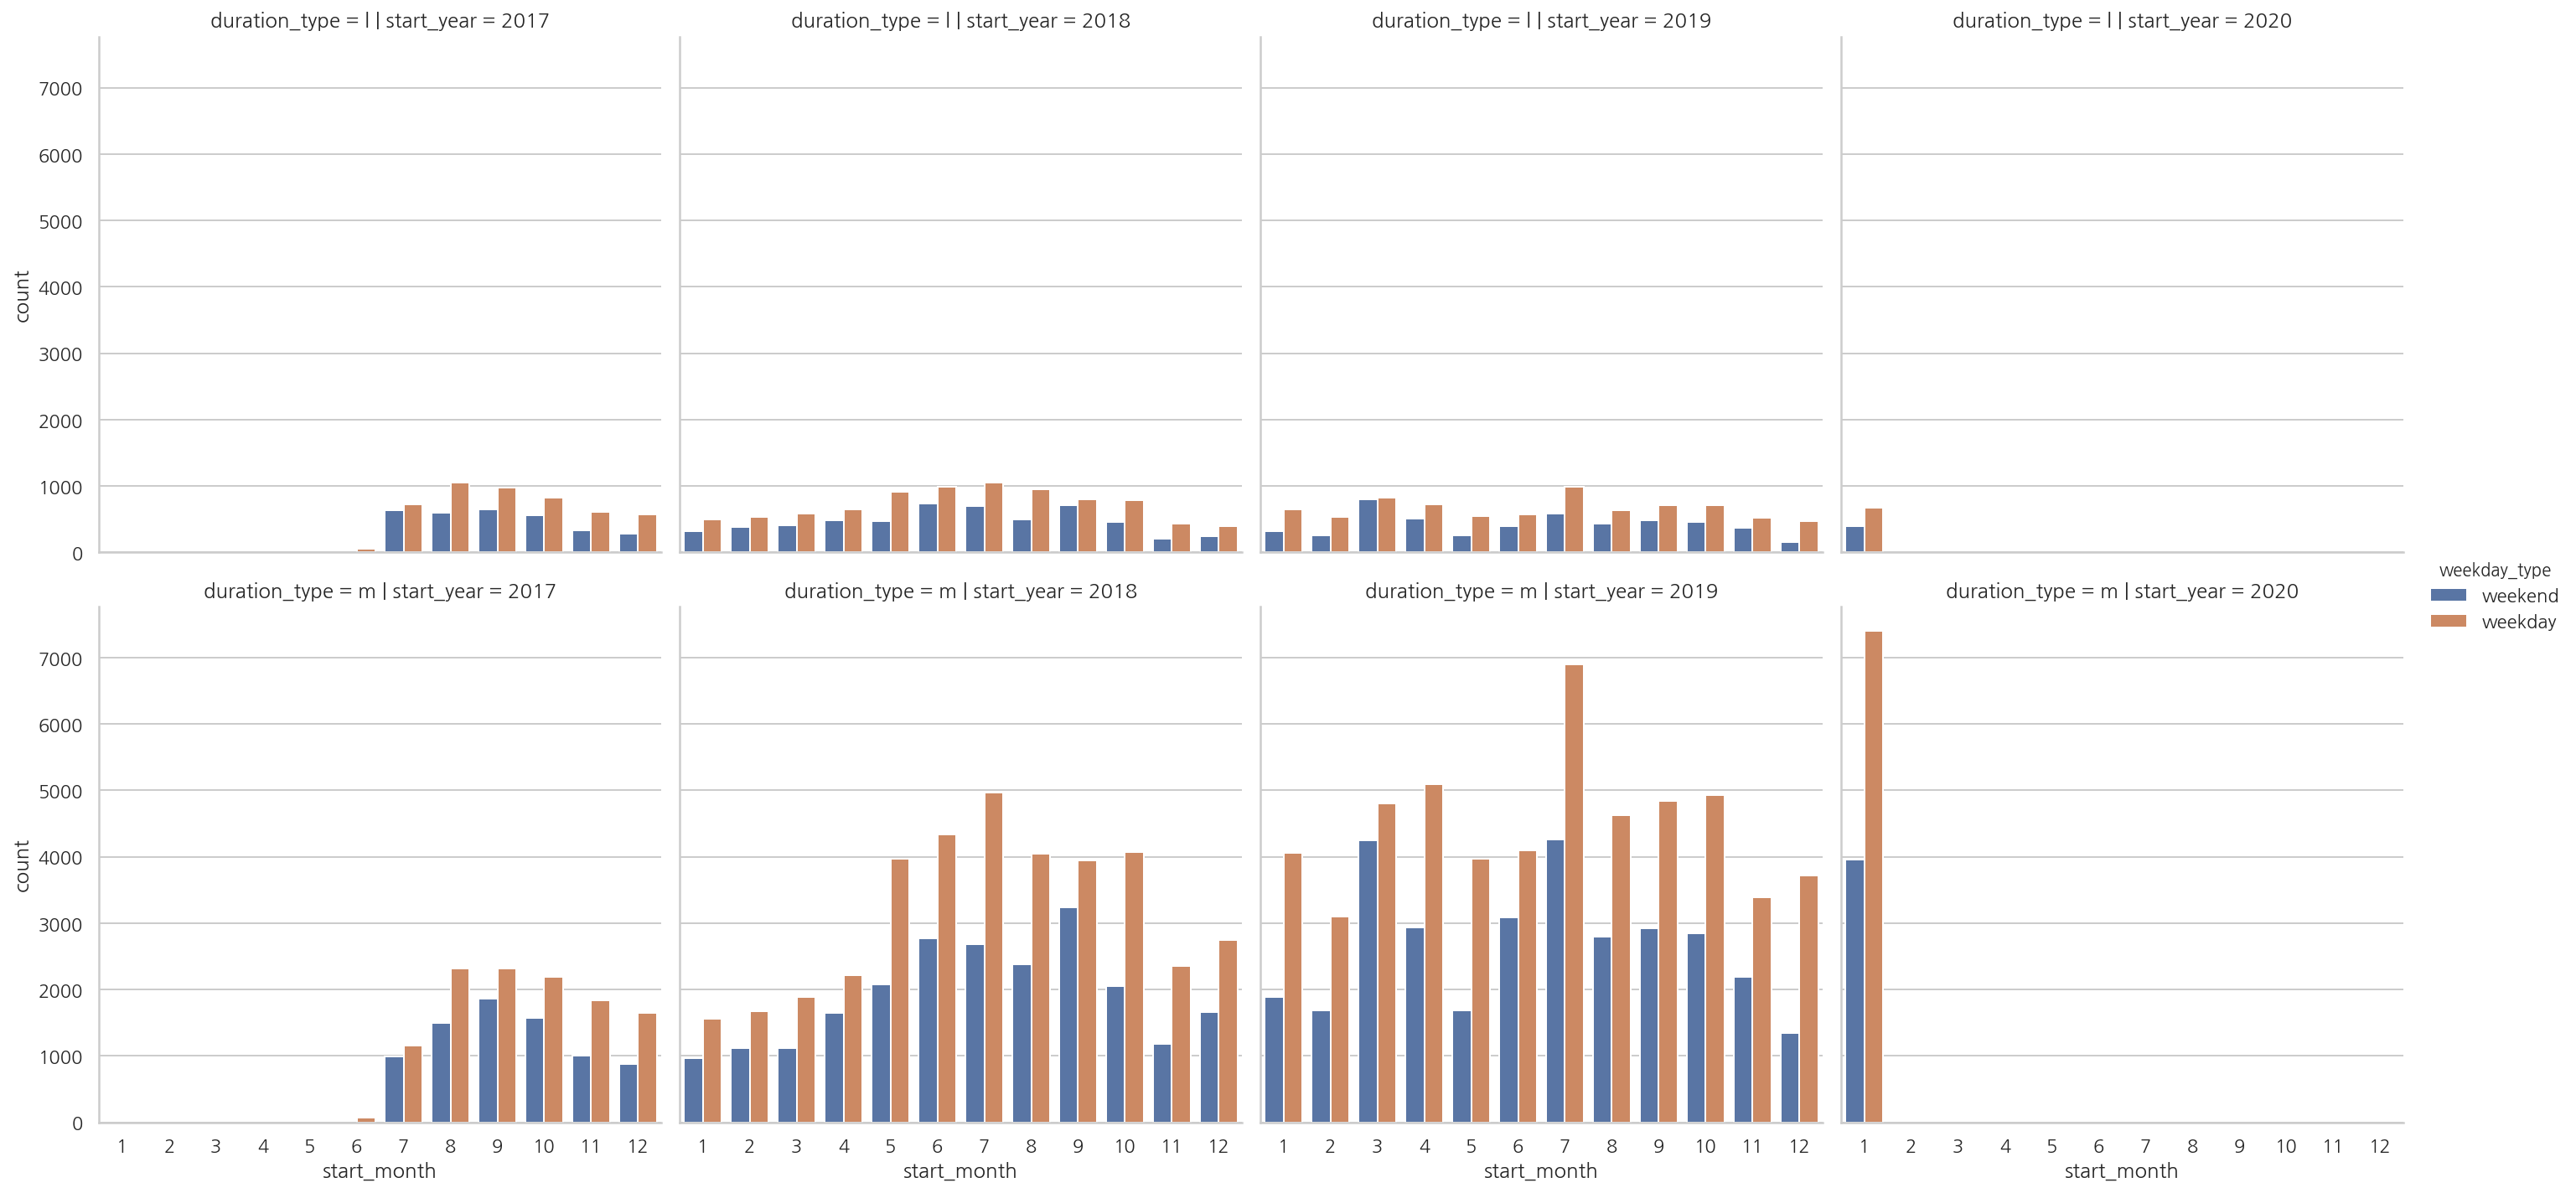

In [17]:
# monthly usage by weekday type by duration type only for s2 trip type
sb.catplot(data=bike.query('trip_type=="s2" and duration_type!="s"'), x='start_month',hue='weekday_type',col='start_year',row='duration_type',kind='count')
plt.show()

Longer trip type less difference in amount between weekday and weekend for s1 type trip. It shows seasonal trend as well. It's same trend with overall data. I plotted above for overall data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

All features are categorical variables so I was using countplot with catplot function. 
I see some of the categorical variables have relationship with some of time related variables. subscriber value of user type is highly related with rush hour time of start_time variable. The rush hour time is also highly related with short trip of duration type. This means most subscriber rides bike for work commuting than for other activities and these rides are usually short trip which takes less than 30 minutes. Casual user(customer) uses bike for both work commuting and other activities and proportion of mid/longer trip usage is higher than the proportion of subscribers. It looks like that logner distance of trip which can be mid/long trip, lesser proportion of subscriber to the casual user means almost half and half or less than casual. Shorter distance of trip higher subscriber than casual user.


### Were there any interesting or surprising interactions between features?

I already stated interactions observed during investigation above. There's no further surprising relationship between them.


### Limitation

I couldn't use start station and end station features because these are geospatial data and they are worth on the map. I have no idea how to investigate these geospatial data for now.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!